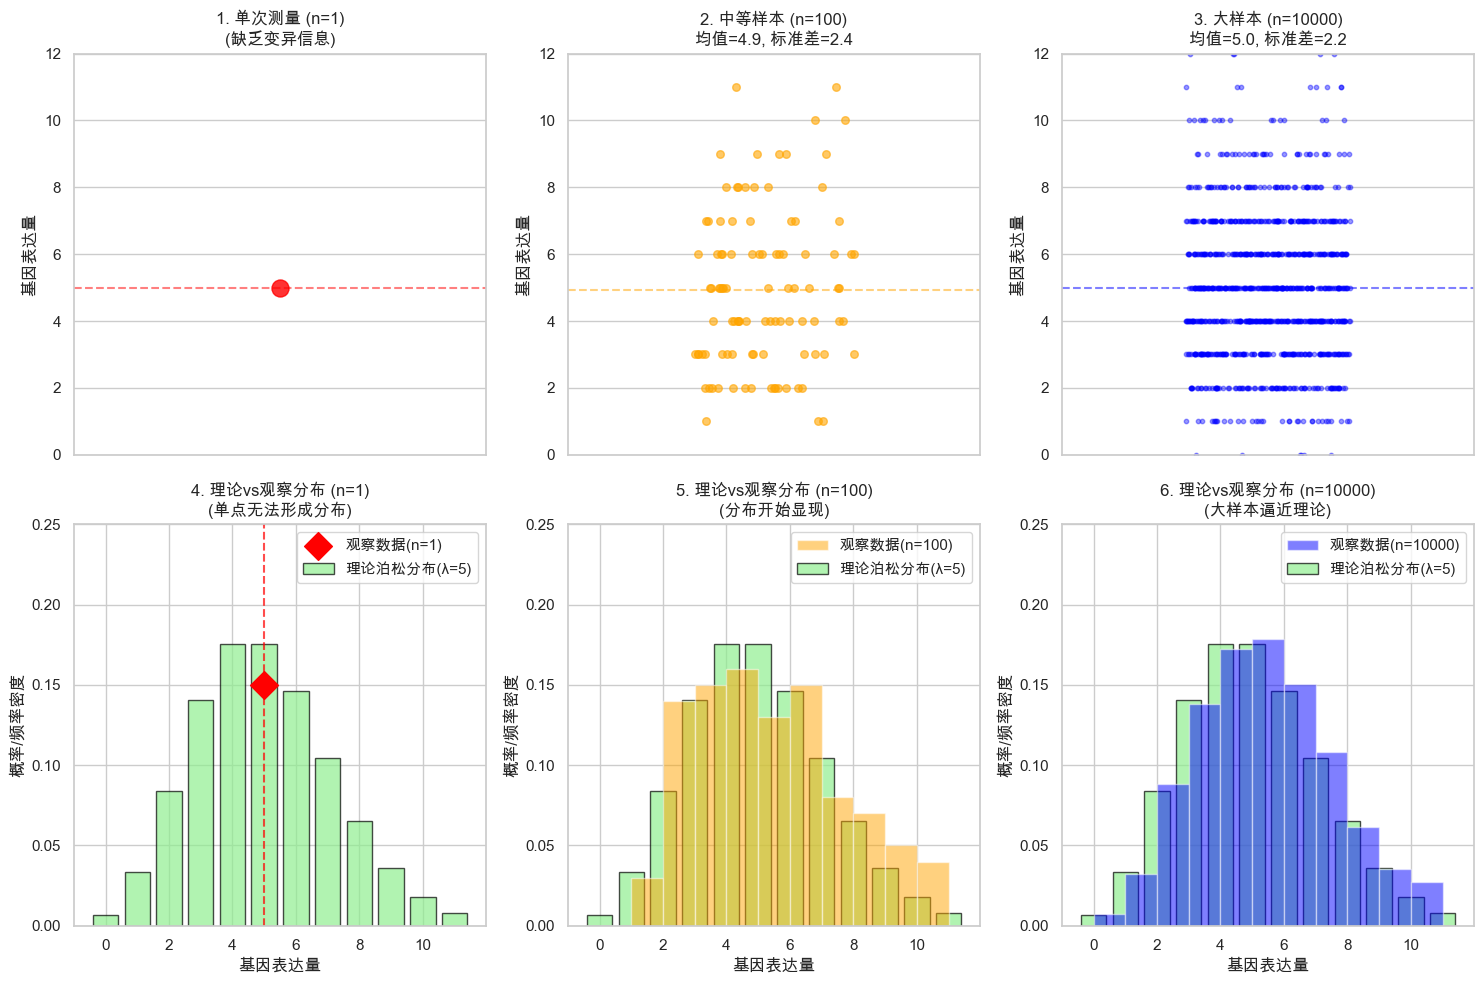

样本量对统计估计的影响

单点测量 (n=1):
  估计均值: 5.000 (误差: 0.000)
  估计标准差: 0.000 (误差: 2.236)

中等样本 (n=100):
  估计均值: 4.940 (误差: 0.060)
  估计标准差: 2.370 (误差: 0.134)
  95%置信区间: [4.476, 5.404] (宽度: 0.929)

大样本 (n=10000):
  估计均值: 5.000 (误差: 0.000)
  估计标准差: 2.234 (误差: 0.002)
  95%置信区间: [4.956, 5.044] (宽度: 0.088)

理论值 (泊松分布 λ=5):
  理论均值: 5
  理论标准差: 2.236

大数定律演示：样本均值收敛到理论均值
样本量     1: 累积均值 = 4.0000, 偏差 = 1.0000
样本量    10: 累积均值 = 3.7000, 偏差 = 1.3000
样本量   100: 累积均值 = 5.1600, 偏差 = 0.1600
样本量  1000: 累积均值 = 5.0600, 偏差 = 0.0600
样本量 10000: 累积均值 = 4.9738, 偏差 = 0.0262


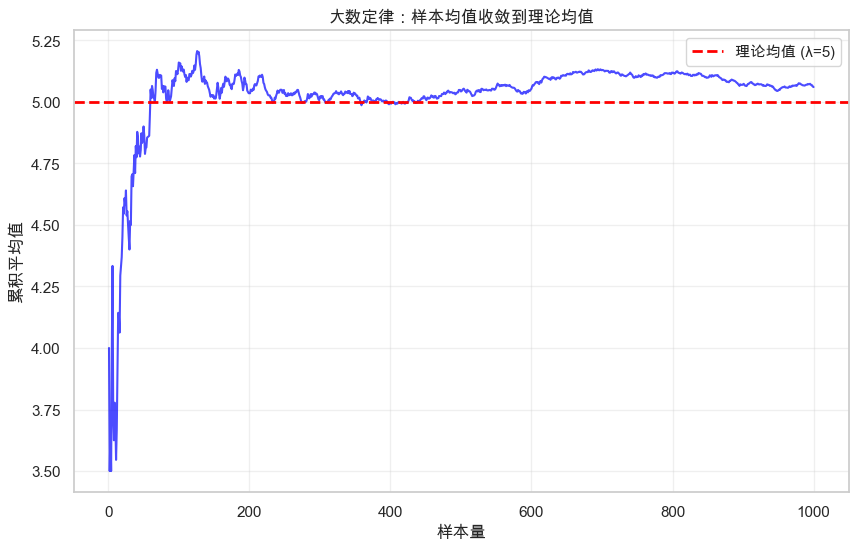

• 单点测量：无法提供变异性信息
• 中等样本：开始显现分布特征，但仍有较大不确定性
• 大样本：分布形状稳定，参数估计准确，置信区间收窄
• 大数定律：样本量越大，估计越接近真实值


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS' 

# 设置随机种子保证结果可重现
np.random.seed(42)

# 创建多个子图展示从点到分布的过程
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. 单个测量点
single_measurement = 5
axes[0,0].scatter([1], [single_measurement], color='red', s=150, alpha=0.8)
axes[0,0].set_xlim(0.5, 1.5)
axes[0,0].set_ylim(0, 12)
axes[0,0].set_xticks([])
axes[0,0].set_ylabel("基因表达量")
axes[0,0].set_title("1. 单次测量 (n=1)\n(缺乏变异信息)")
axes[0,0].axhline(y=single_measurement, color='red', linestyle='--', alpha=0.5)

# 2. 中等样本 (n=100)
medium_sample = np.random.poisson(lam=5, size=100)
x_positions_medium = np.random.uniform(0.8, 1.2, 100)
axes[0,1].scatter(x_positions_medium, medium_sample, color='orange', s=30, alpha=0.6)
axes[0,1].set_xlim(0.5, 1.5)
axes[0,1].set_ylim(0, 12)
axes[0,1].set_xticks([])
axes[0,1].set_ylabel("基因表达量")
axes[0,1].set_title(f"2. 中等样本 (n=100)\n均值={np.mean(medium_sample):.1f}, 标准差={np.std(medium_sample):.1f}")
axes[0,1].axhline(y=np.mean(medium_sample), color='orange', linestyle='--', alpha=0.5)

# 3. 大样本 (n=10000)
large_sample = np.random.poisson(lam=5, size=10000)
x_positions_large = np.random.uniform(0.8, 1.2, 10000)
# 为了避免过度拥挤，只显示前1000个点
display_indices = np.random.choice(10000, 1000, replace=False)
axes[0,2].scatter(x_positions_large[display_indices], large_sample[display_indices], 
                 color='blue', s=10, alpha=0.4)
axes[0,2].set_xlim(0.5, 1.5)
axes[0,2].set_ylim(0, 12)
axes[0,2].set_xticks([])
axes[0,2].set_ylabel("基因表达量")
axes[0,2].set_title(f"3. 大样本 (n=10000)\n均值={np.mean(large_sample):.1f}, 标准差={np.std(large_sample):.1f}")
axes[0,2].axhline(y=np.mean(large_sample), color='blue', linestyle='--', alpha=0.5)

# 4. 理论分布对比 - 单点测量 (n=1)
x_theory = np.arange(0, 12)
poisson_pmf = stats.poisson.pmf(x_theory, mu=5)  # 使用真实参数λ=5

axes[1,0].bar(x_theory, poisson_pmf, alpha=0.7, color='lightgreen', 
             edgecolor='black', label='理论泊松分布(λ=5)')
# 对于单点，用不同的可视化方式
axes[1,0].scatter([single_measurement], [0.15], color='red', s=200, 
                 marker='D', label=f'观察数据(n=1)', zorder=5)
axes[1,0].axvline(x=single_measurement, color='red', linestyle='--', alpha=0.7)
axes[1,0].set_xlabel("基因表达量")
axes[1,0].set_ylabel("概率/频率密度")
axes[1,0].set_title("4. 理论vs观察分布 (n=1)\n(单点无法形成分布)")
axes[1,0].legend()
axes[1,0].set_ylim(0, 0.25)

# 5. 理论分布对比 - 中等样本 (n=100)
axes[1,1].bar(x_theory, poisson_pmf, alpha=0.7, color='lightgreen', 
             edgecolor='black', label='理论泊松分布(λ=5)')
axes[1,1].hist(medium_sample, bins=range(0, 12), density=True, alpha=0.5, 
              color='orange', label='观察数据(n=100)')
axes[1,1].set_xlabel("基因表达量")
axes[1,1].set_ylabel("概率/频率密度")
axes[1,1].set_title("5. 理论vs观察分布 (n=100)\n(分布开始显现)")
axes[1,1].legend()
axes[1,1].set_ylim(0, 0.25)

# 6. 理论分布拟合对比 - 大样本 (n=10000)
axes[1,2].bar(x_theory, poisson_pmf, alpha=0.7, color='lightgreen', 
             edgecolor='black', label='理论泊松分布(λ=5)')
axes[1,2].hist(large_sample, bins=range(0, 12), density=True, alpha=0.5, 
              color='blue', label='观察数据(n=10000)')
axes[1,2].set_xlabel("基因表达量")
axes[1,2].set_ylabel("概率/频率密度")
axes[1,2].set_title("6. 理论vs观察分布 (n=10000)\n(大样本逼近理论)")
axes[1,2].legend()
axes[1,2].set_ylim(0, 0.25)

plt.tight_layout()
plt.show()

# 比较不同样本量的统计特性
print("=" * 80)
print("样本量对统计估计的影响")
print("=" * 80)

samples = {
    "单点测量 (n=1)": np.array([single_measurement]),
    "中等样本 (n=100)": medium_sample,
    "大样本 (n=10000)": large_sample
}

theoretical_mean = 5
theoretical_std = np.sqrt(5)

for name, sample in samples.items():
    mean_est = np.mean(sample)
    std_est = np.std(sample)
    
    # 计算估计误差
    mean_error = abs(mean_est - theoretical_mean)
    std_error = abs(std_est - theoretical_std)
    
    print(f"\n{name}:")
    print(f"  估计均值: {mean_est:.3f} (误差: {mean_error:.3f})")
    print(f"  估计标准差: {std_est:.3f} (误差: {std_error:.3f})")
    
    if len(sample) > 1:
        # 计算95%置信区间
        ci_margin = 1.96 * std_est / np.sqrt(len(sample))
        ci_lower = mean_est - ci_margin
        ci_upper = mean_est + ci_margin
        ci_width = ci_upper - ci_lower
        print(f"  95%置信区间: [{ci_lower:.3f}, {ci_upper:.3f}] (宽度: {ci_width:.3f})")

print(f"\n理论值 (泊松分布 λ=5):")
print(f"  理论均值: {theoretical_mean}")
print(f"  理论标准差: {theoretical_std:.3f}")

# 展示大数定律
print("\n" + "=" * 80)
print("大数定律演示：样本均值收敛到理论均值")
print("=" * 80)

# 计算累积均值
cumulative_sample = np.random.poisson(lam=5, size=10000)
sample_sizes = [1, 10, 100, 1000, 10000]
cumulative_means = []

for n in sample_sizes:
    cum_mean = np.mean(cumulative_sample[:n])
    cumulative_means.append(cum_mean)
    print(f"样本量 {n:5d}: 累积均值 = {cum_mean:.4f}, 偏差 = {abs(cum_mean - 5):.4f}")

# 可视化大数定律
plt.figure(figsize=(10, 6))
sample_range = np.arange(1, 1001)
running_means = np.cumsum(cumulative_sample[:1000]) / sample_range
plt.plot(sample_range, running_means, color='blue', alpha=0.7)
plt.axhline(y=5, color='red', linestyle='--', linewidth=2, label='理论均值 (λ=5)')
plt.xlabel('样本量')
plt.ylabel('累积平均值')
plt.title('大数定律：样本均值收敛到理论均值')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("• 单点测量：无法提供变异性信息")
print("• 中等样本：开始显现分布特征，但仍有较大不确定性")
print("• 大样本：分布形状稳定，参数估计准确，置信区间收窄")
print("• 大数定律：样本量越大，估计越接近真实值")

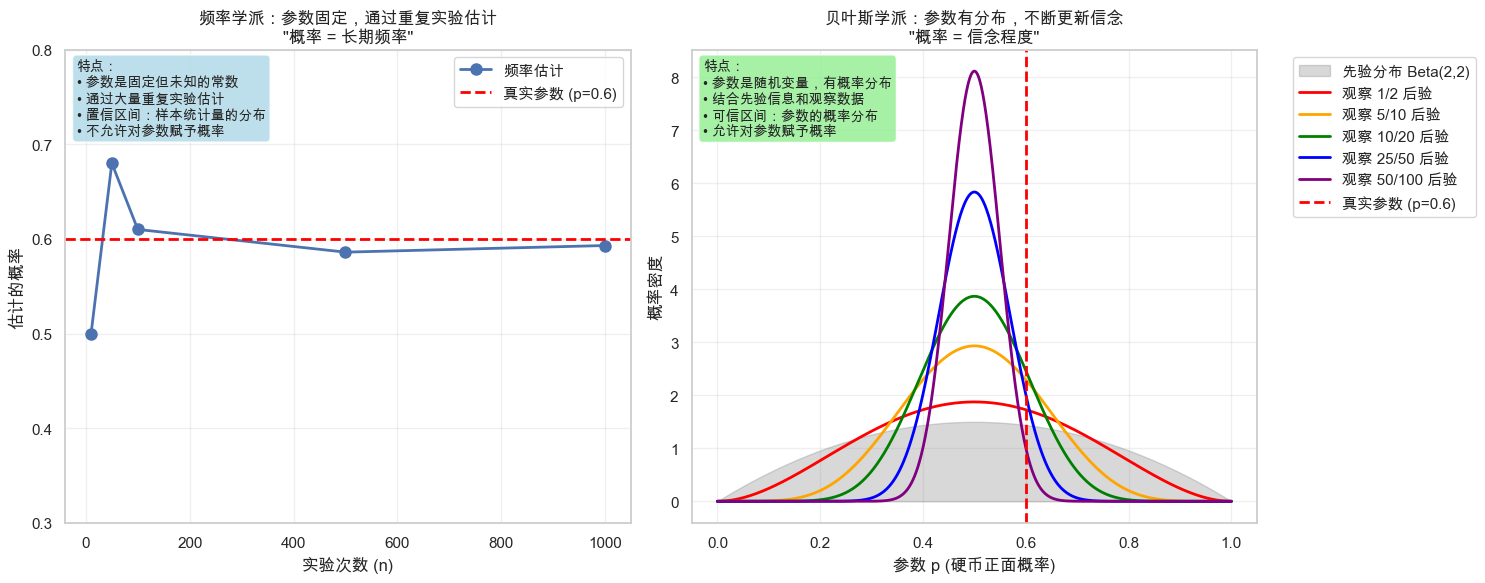

贝叶斯学派 vs 频率学派：数值对比
真实参数: p = 0.6

频率学派估计 (最终): 0.593
贝叶斯估计 (后验均值): 0.500
贝叶斯 95%可信区间: [0.405, 0.595]
频率学派 95%置信区间: [0.563, 0.623]

核心差异总结
📊 频率学派 (Frequentist):
   • 参数是固定但未知的常数
   • 概率 = 长期重复实验的频率
   • 置信区间：如果重复采样，95%的区间会包含真实参数
   • 客观性：不依赖主观先验

🎯 贝叶斯学派 (Bayesian):
   • 参数是有概率分布的随机变量
   • 概率 = 对不确定性的信念程度
   • 可信区间：参数有95%的概率落在此区间内
   • 主观性：可以融入先验知识

💡 实践意义:
   • 频率学派：严格客观，适合标准化分析
   • 贝叶斯学派：灵活直观，适合融合多源信息


In [12]:
# 贝叶斯学派 vs 频率学派的对比
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS' 

# 设置随机种子
np.random.seed(42)

# 创建对比图
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# === 左图：频率学派 - 固定参数，重复实验 ===
# 假设我们想估计硬币正面朝上的概率，真实值p=0.6
true_p = 0.6
experiments = [10, 50, 100, 500, 1000]

# 模拟多次实验，每次实验投掷不同次数
results_freq = []
for n in experiments:
    # 投掷n次硬币
    tosses = np.random.binomial(1, true_p, n)
    p_estimate = np.mean(tosses)  # 频率估计
    results_freq.append(p_estimate)

axes[0].plot(experiments, results_freq, 'bo-', linewidth=2, markersize=8, label='频率估计')
axes[0].axhline(y=true_p, color='red', linestyle='--', linewidth=2, label=f'真实参数 (p={true_p})')
axes[0].set_xlabel('实验次数 (n)')
axes[0].set_ylabel('估计的概率')
axes[0].set_title('频率学派：参数固定，通过重复实验估计\n"概率 = 长期频率"')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(0.3, 0.8)

# 添加文字说明
axes[0].text(0.02, 0.98, 
             '特点：\n• 参数是固定但未知的常数\n• 通过大量重复实验估计\n• 置信区间：样本统计量的分布\n• 不允许对参数赋予概率', 
             transform=axes[0].transAxes, 
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
             fontsize=10)

# === 右图：贝叶斯学派 - 参数有分布，更新信念 ===
# 贝叶斯更新过程：Beta-Binomial共轭
# 先验：Beta(2, 2) - 弱信息先验
# 数据：观察到的正面次数
observations = [1, 5, 10, 25, 50]  # 累积观察的正面次数
total_tosses = [2, 10, 20, 50, 100]  # 累积投掷次数

x = np.linspace(0, 1, 1000)
colors = ['red', 'orange', 'green', 'blue', 'purple']

for i, (heads, n) in enumerate(zip(observations, total_tosses)):
    # 贝叶斯更新：后验 = Beta(先验α + 观察正面数, 先验β + 观察反面数)
    alpha_post = 2 + heads  # 先验alpha=2
    beta_post = 2 + (n - heads)  # 先验beta=2
    
    posterior = stats.beta(alpha_post, beta_post)
    posterior_pdf = posterior.pdf(x)
    
    if i == 0:
        # 先验分布
        prior = stats.beta(2, 2)
        axes[1].fill_between(x, prior.pdf(x), alpha=0.3, color='gray', label='先验分布 Beta(2,2)')
    
    axes[1].plot(x, posterior_pdf, color=colors[i], linewidth=2, 
                label=f'观察 {heads}/{n} 后验')

axes[1].axvline(x=true_p, color='red', linestyle='--', linewidth=2, label=f'真实参数 (p={true_p})')
axes[1].set_xlabel('参数 p (硬币正面概率)')
axes[1].set_ylabel('概率密度')
axes[1].set_title('贝叶斯学派：参数有分布，不断更新信念\n"概率 = 信念程度"')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)

# 添加文字说明
axes[1].text(0.02, 0.98, 
             '特点：\n• 参数是随机变量，有概率分布\n• 结合先验信息和观察数据\n• 可信区间：参数的概率分布\n• 允许对参数赋予概率', 
             transform=axes[1].transAxes, 
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
             fontsize=10)

plt.tight_layout()
plt.show()

# 打印数值比较
print("=" * 80)
print("贝叶斯学派 vs 频率学派：数值对比")
print("=" * 80)

print(f"真实参数: p = {true_p}")
print(f"\n频率学派估计 (最终): {results_freq[-1]:.3f}")

# 贝叶斯最终后验的均值和置信区间
final_alpha = 2 + observations[-1]
final_beta = 2 + (total_tosses[-1] - observations[-1])
bayesian_mean = final_alpha / (final_alpha + final_beta)
bayesian_ci = stats.beta(final_alpha, final_beta).interval(0.95)

print(f"贝叶斯估计 (后验均值): {bayesian_mean:.3f}")
print(f"贝叶斯 95%可信区间: [{bayesian_ci[0]:.3f}, {bayesian_ci[1]:.3f}]")

# 频率学派置信区间
freq_p = results_freq[-1]
freq_n = experiments[-1]
freq_se = np.sqrt(freq_p * (1 - freq_p) / freq_n)
freq_ci = [freq_p - 1.96*freq_se, freq_p + 1.96*freq_se]
print(f"频率学派 95%置信区间: [{freq_ci[0]:.3f}, {freq_ci[1]:.3f}]")

print("\n" + "=" * 80)
print("核心差异总结")
print("=" * 80)
print("📊 频率学派 (Frequentist):")
print("   • 参数是固定但未知的常数")
print("   • 概率 = 长期重复实验的频率")
print("   • 置信区间：如果重复采样，95%的区间会包含真实参数")
print("   • 客观性：不依赖主观先验")

print("\n🎯 贝叶斯学派 (Bayesian):")
print("   • 参数是有概率分布的随机变量")
print("   • 概率 = 对不确定性的信念程度")
print("   • 可信区间：参数有95%的概率落在此区间内")
print("   • 主观性：可以融入先验知识")

print("\n💡 实践意义:")
print("   • 频率学派：严格客观，适合标准化分析")
print("   • 贝叶斯学派：灵活直观，适合融合多源信息")

## 概率在机器学习中的三大应用

### 1. 分类 (Classification)
- 传统方法：只输出预测类别"
- 概率方法：输出每个类别的概率分布 P(y|x)"
- 实际价值：
    - 置信度评估：高概率预测可直接使用"
    - 不确定性处理：低概率预测需人工审核"
    - 决策支持：基于概率阈值进行风险控制"

### 2. 生成 (Generation)
- 核心目标：学习数据的真实分布 P(X)"
- 工作原理：从学习到的分布中采样生成新数据"
- 典型应用：
    - 数据增强：扩充训练数据集"
    - 内容创作：生成图像、文本、音频"
    - 异常检测：识别低概率的异常样本"
    - 风格迁移：在不同风格间转换"

### 3. 推断 (Inference)"
- 贝叶斯框架：将模型参数视为随机变量"
- 不确定性类型
    - 认知不确定性：参数估计的不确定性"
    - 偶然不确定性：数据固有的噪声"
- 实践优势：
    - 可靠预测：提供预测区间而非点估计"
    - 主动学习：选择最不确定的样本标注"
    - 风险量化：为决策提供不确定性信息"

**总结：概率为机器学习提供了处理不确定性的数学框架"**

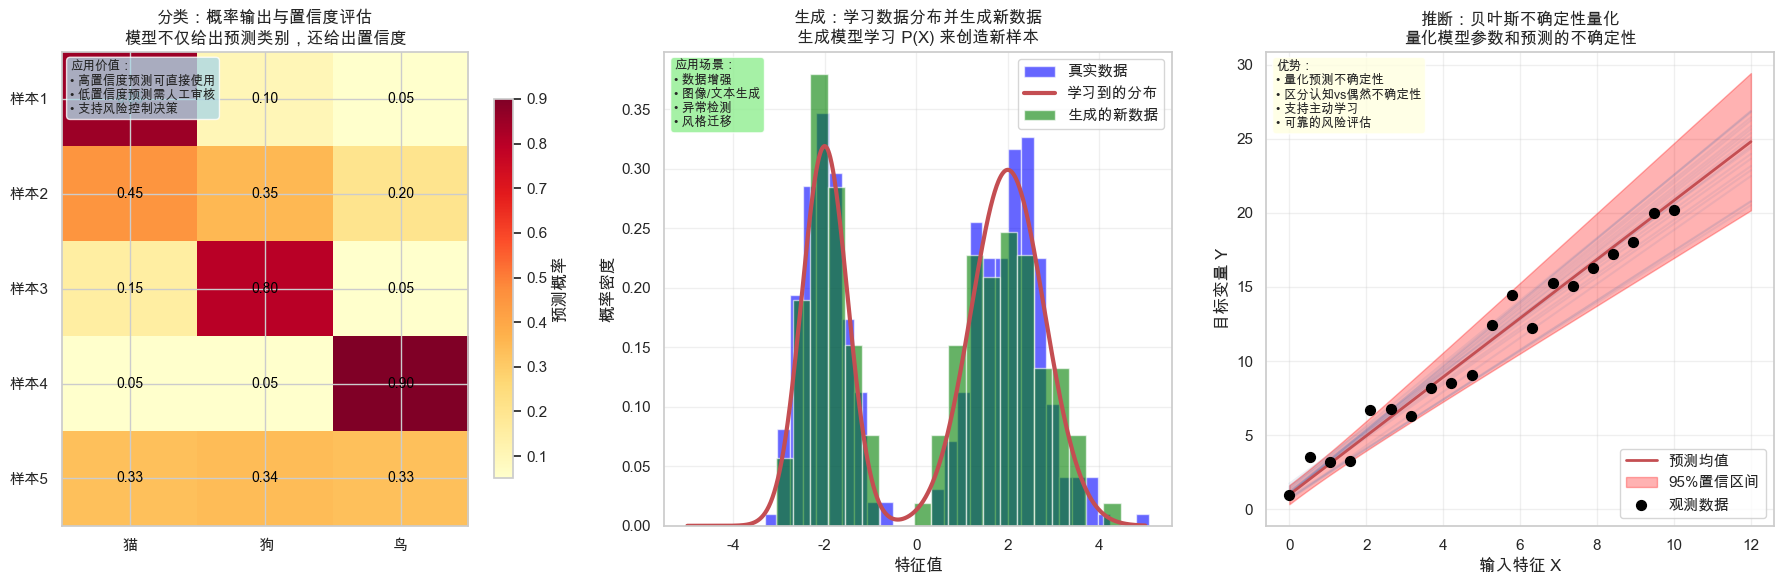

In [14]:
# 概率在机器学习中的应用
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS' 

# 设置随机种子
np.random.seed(42)

# 创建三个子图
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# === 图1：分类 - 概率输出与置信度评估 ===
# 模拟神经网络分类结果
samples = ['样本1', '样本2', '样本3', '样本4', '样本5']
classes = ['猫', '狗', '鸟']

# 模拟每个样本对每个类别的预测概率
probabilities = np.array([
    [0.85, 0.10, 0.05],  # 样本1: 高置信度猫
    [0.45, 0.35, 0.20],  # 样本2: 低置信度猫
    [0.15, 0.80, 0.05],  # 样本3: 高置信度狗
    [0.05, 0.05, 0.90],  # 样本4: 高置信度鸟
    [0.33, 0.34, 0.33],  # 样本5: 非常不确定
])

# 创建热力图
im = axes[0].imshow(probabilities, cmap='YlOrRd', aspect='auto')
axes[0].set_xticks(range(len(classes)))
axes[0].set_xticklabels(classes)
axes[0].set_yticks(range(len(samples)))
axes[0].set_yticklabels(samples)
axes[0].set_title('分类：概率输出与置信度评估\n模型不仅给出预测类别，还给出置信度')

# 添加数值标注
for i in range(len(samples)):
    for j in range(len(classes)):
        text = axes[0].text(j, i, f'{probabilities[i, j]:.2f}',
                           ha="center", va="center", color="black", fontsize=10)

# 添加颜色条
cbar = plt.colorbar(im, ax=axes[0], shrink=0.8)
cbar.set_label('预测概率')

# 添加说明文字
axes[0].text(0.02, 0.98, 
             '应用价值：\n• 高置信度预测可直接使用\n• 低置信度预测需人工审核\n• 支持风险控制决策', 
             transform=axes[0].transAxes, 
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
             fontsize=9)

# === 图2：生成 - 学习数据分布并生成新数据 ===
# 模拟真实数据分布 (双模态高斯分布)
np.random.seed(42)
real_data1 = np.random.normal(-2, 0.5, 150)
real_data2 = np.random.normal(2, 0.8, 200)
real_data = np.concatenate([real_data1, real_data2])

# 模拟学习到的分布
x = np.linspace(-5, 5, 1000)
learned_dist = 0.4 * stats.norm.pdf(x, -2, 0.5) + 0.6 * stats.norm.pdf(x, 2, 0.8)

# 从学习到的分布生成新数据
generated_data1 = np.random.normal(-2, 0.5, 60)
generated_data2 = np.random.normal(2, 0.8, 80)
generated_data = np.concatenate([generated_data1, generated_data2])

# 绘制分布
axes[1].hist(real_data, bins=30, density=True, alpha=0.6, color='blue', label='真实数据')
axes[1].plot(x, learned_dist, 'r-', linewidth=3, label='学习到的分布')
axes[1].hist(generated_data, bins=20, density=True, alpha=0.6, color='green', label='生成的新数据')

axes[1].set_xlabel('特征值')
axes[1].set_ylabel('概率密度')
axes[1].set_title('生成：学习数据分布并生成新数据\n生成模型学习 P(X) 来创造新样本')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 添加说明文字
axes[1].text(0.02, 0.98, 
             '应用场景：\n• 数据增强\n• 图像/文本生成\n• 异常检测\n• 风格迁移', 
             transform=axes[1].transAxes, 
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
             fontsize=9)

# === 图3：推断 - 贝叶斯不确定性量化 ===
# 模拟贝叶斯线性回归的不确定性
x_data = np.linspace(0, 10, 20)
y_true = 2 * x_data + 1 + np.random.normal(0, 1, 20)

# 模拟贝叶斯推断结果 - 参数的后验分布
x_pred = np.linspace(0, 12, 100)
n_samples = 100

# 模拟从后验分布采样的参数
slopes = np.random.normal(2, 0.2, n_samples)
intercepts = np.random.normal(1, 0.3, n_samples)

# 绘制不确定性
for i in range(min(20, n_samples)):
    y_pred = slopes[i] * x_pred + intercepts[i]
    axes[2].plot(x_pred, y_pred, 'b-', alpha=0.1)

# 预测均值和置信区间
y_mean = np.mean(slopes) * x_pred + np.mean(intercepts)
y_std = np.sqrt((np.var(slopes) * x_pred**2 + np.var(intercepts)))

axes[2].plot(x_pred, y_mean, 'r-', linewidth=2, label='预测均值')
axes[2].fill_between(x_pred, y_mean - 2*y_std, y_mean + 2*y_std, 
                    alpha=0.3, color='red', label='95%置信区间')
axes[2].scatter(x_data, y_true, color='black', s=50, zorder=5, label='观测数据')

axes[2].set_xlabel('输入特征 X')
axes[2].set_ylabel('目标变量 Y')
axes[2].set_title('推断：贝叶斯不确定性量化\n量化模型参数和预测的不确定性')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# 添加说明文字
axes[2].text(0.02, 0.98, 
             '优势：\n• 量化预测不确定性\n• 区分认知vs偶然不确定性\n• 支持主动学习\n• 可靠的风险评估', 
             transform=axes[2].transAxes, 
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8),
             fontsize=9)

plt.tight_layout()
plt.show()

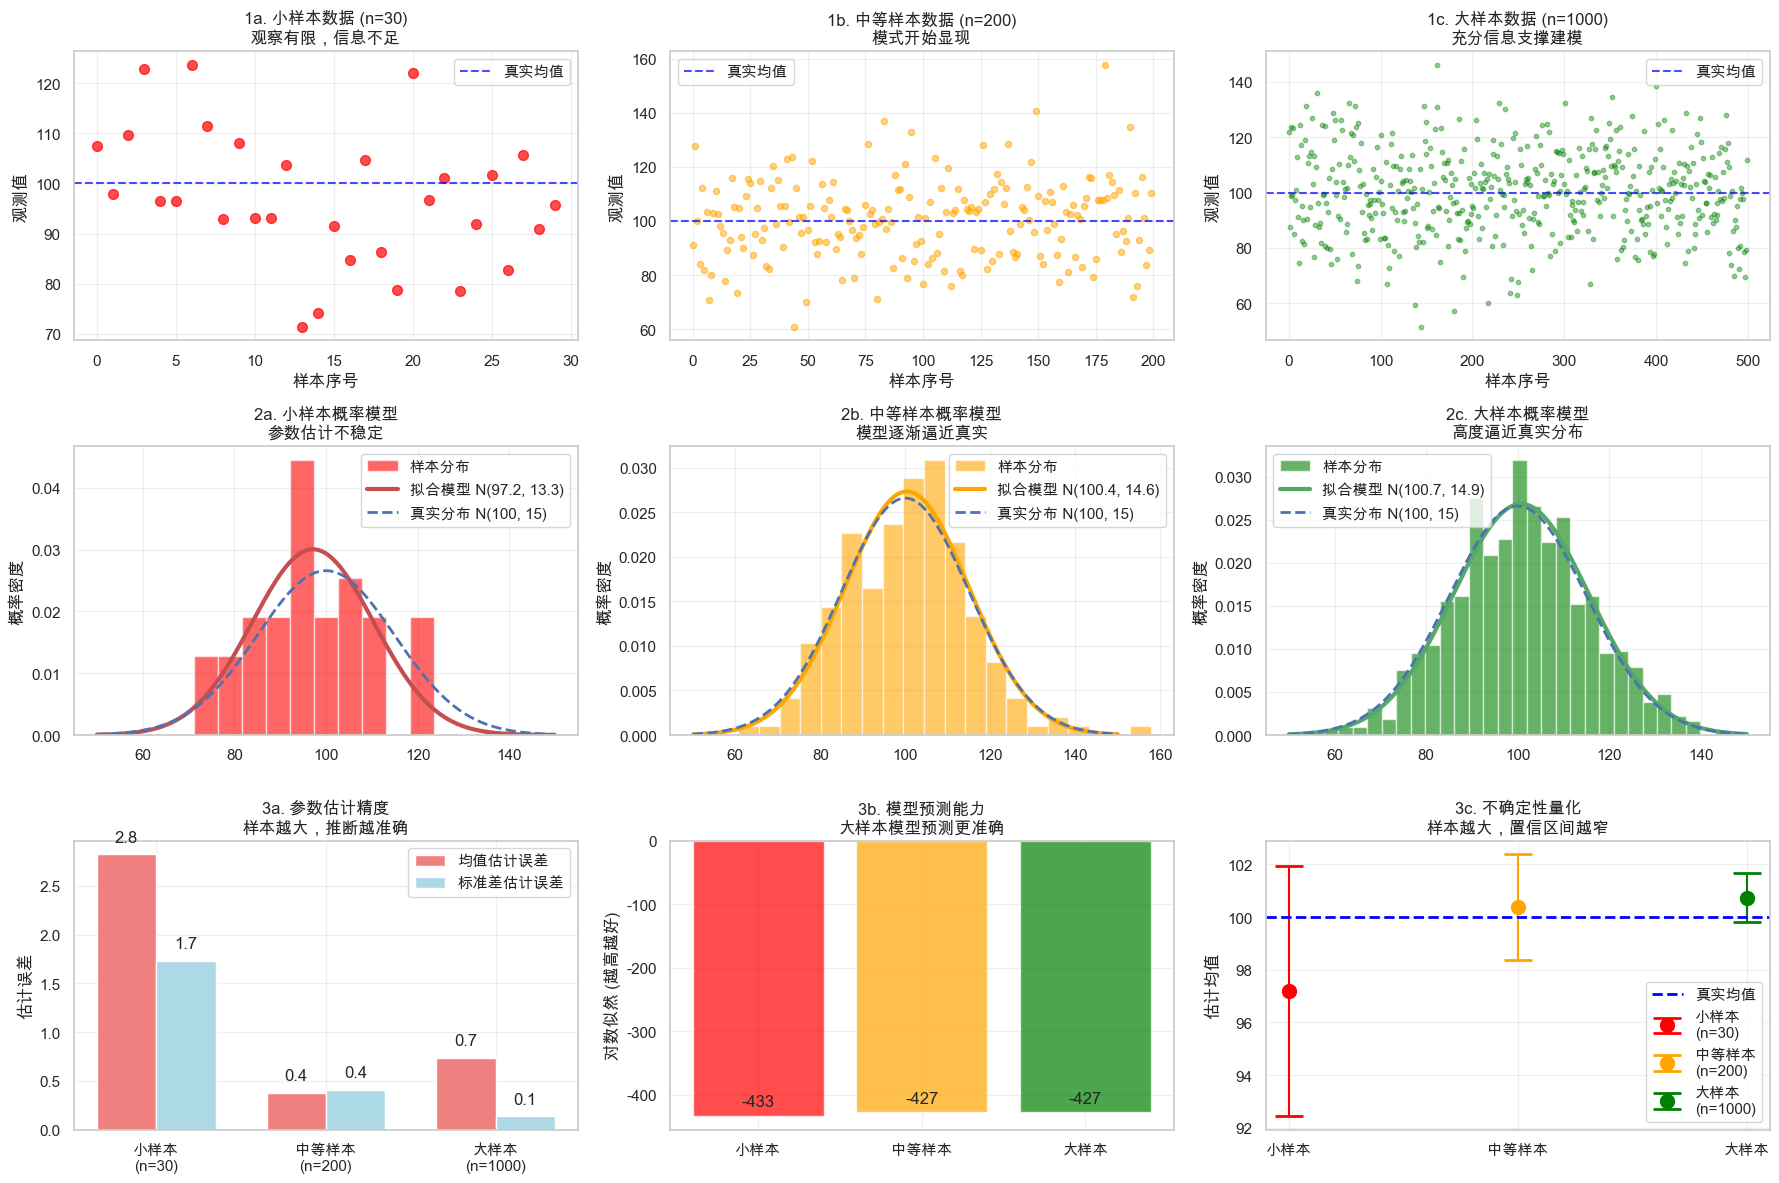

样本数据 → 概率模型 → 推断真实规律：数值总结
真实参数: 均值=100, 标准差=15

各阶段结果对比:

小样本 (n=30):
  估计均值: 97.18 (误差: 2.82)
  估计标准差: 13.27 (误差: 1.73)
  95%置信区间宽度: 9.50

中等样本 (n=200):
  估计均值: 100.38 (误差: 0.38)
  估计标准差: 14.59 (误差: 0.41)
  95%置信区间宽度: 4.04

大样本 (n=1000):
  估计均值: 100.74 (误差: 0.74)
  估计标准差: 14.86 (误差: 0.14)
  95%置信区间宽度: 1.84

关键洞察:
🔍 样本数据：原始观察，包含噪声和随机性
📊 概率模型：数学抽象，捕捉数据的统计规律
🎯 推断规律：通过模型逼近真实的生成过程
📈 样本量效应：更多数据 → 更好模型 → 更准确推断


In [ ]:
# 样本数据 → 概率模型 → 推断真实规律
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS' 

# 设置随机种子
np.random.seed(42)

# 创建三个阶段的可视化
fig = plt.figure(figsize=(18, 12))

# 真实规律（隐藏的生成过程）
true_mean = 100
true_std = 15
true_dist = stats.norm(true_mean, true_std)

# === 第一步：样本数据收集 ===
ax1 = plt.subplot(3, 3, 1)
# 小样本
small_sample = np.random.normal(true_mean, true_std, 30)
ax1.scatter(range(len(small_sample)), small_sample, color='red', alpha=0.7, s=50)
ax1.set_title('1a. 小样本数据 (n=30)\n观察有限，信息不足')
ax1.set_ylabel('观测值')
ax1.set_xlabel('样本序号')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=true_mean, color='blue', linestyle='--', alpha=0.7, label='真实均值')
ax1.legend()

ax2 = plt.subplot(3, 3, 2)
# 中等样本
medium_sample = np.random.normal(true_mean, true_std, 200)
ax2.scatter(range(len(medium_sample)), medium_sample, color='orange', alpha=0.5, s=20)
ax2.set_title('1b. 中等样本数据 (n=200)\n模式开始显现')
ax2.set_ylabel('观测值')
ax2.set_xlabel('样本序号')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=true_mean, color='blue', linestyle='--', alpha=0.7, label='真实均值')
ax2.legend()

ax3 = plt.subplot(3, 3, 3)
# 大样本
large_sample = np.random.normal(true_mean, true_std, 1000)
sample_display = np.random.choice(large_sample, 500, replace=False)  # 显示部分点
ax3.scatter(range(len(sample_display)), sample_display, color='green', alpha=0.4, s=10)
ax3.set_title('1c. 大样本数据 (n=1000)\n充分信息支撑建模')
ax3.set_ylabel('观测值')
ax3.set_xlabel('样本序号')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=true_mean, color='blue', linestyle='--', alpha=0.7, label='真实均值')
ax3.legend()

# === 第二步：概率模型拟合 ===
x_range = np.linspace(50, 150, 1000)

ax4 = plt.subplot(3, 3, 4)
# 小样本的概率模型
small_mean = np.mean(small_sample)
small_std = np.std(small_sample)
small_model = stats.norm(small_mean, small_std)

ax4.hist(small_sample, bins=10, density=True, alpha=0.6, color='red', label='样本分布')
ax4.plot(x_range, small_model.pdf(x_range), 'r-', linewidth=3, label=f'拟合模型 N({small_mean:.1f}, {small_std:.1f})')
ax4.plot(x_range, true_dist.pdf(x_range), 'b--', linewidth=2, label=f'真实分布 N({true_mean}, {true_std})')
ax4.set_title('2a. 小样本概率模型\n参数估计不稳定')
ax4.set_ylabel('概率密度')
ax4.legend()
ax4.grid(True, alpha=0.3)

ax5 = plt.subplot(3, 3, 5)
# 中等样本的概率模型
medium_mean = np.mean(medium_sample)
medium_std = np.std(medium_sample)
medium_model = stats.norm(medium_mean, medium_std)

ax5.hist(medium_sample, bins=20, density=True, alpha=0.6, color='orange', label='样本分布')
ax5.plot(x_range, medium_model.pdf(x_range), 'orange', linewidth=3, label=f'拟合模型 N({medium_mean:.1f}, {medium_std:.1f})')
ax5.plot(x_range, true_dist.pdf(x_range), 'b--', linewidth=2, label=f'真实分布 N({true_mean}, {true_std})')
ax5.set_title('2b. 中等样本概率模型\n模型逐渐逼近真实')
ax5.set_ylabel('概率密度')
ax5.legend()
ax5.grid(True, alpha=0.3)

ax6 = plt.subplot(3, 3, 6)
# 大样本的概率模型
large_mean = np.mean(large_sample)
large_std = np.std(large_sample)
large_model = stats.norm(large_mean, large_std)

ax6.hist(large_sample, bins=30, density=True, alpha=0.6, color='green', label='样本分布')
ax6.plot(x_range, large_model.pdf(x_range), 'g-', linewidth=3, label=f'拟合模型 N({large_mean:.1f}, {large_std:.1f})')
ax6.plot(x_range, true_dist.pdf(x_range), 'b--', linewidth=2, label=f'真实分布 N({true_mean}, {true_std})')
ax6.set_title('2c. 大样本概率模型\n高度逼近真实分布')
ax6.set_ylabel('概率密度')
ax6.legend()
ax6.grid(True, alpha=0.3)

# === 第三步：推断真实规律 ===
ax7 = plt.subplot(3, 3, 7)
# 参数估计的不确定性
param_errors_mean = [abs(small_mean - true_mean), abs(medium_mean - true_mean), abs(large_mean - true_mean)]
param_errors_std = [abs(small_std - true_std), abs(medium_std - true_std), abs(large_std - true_std)]
sample_sizes = ['小样本\n(n=30)', '中等样本\n(n=200)', '大样本\n(n=1000)']

x_pos = np.arange(len(sample_sizes))
width = 0.35

bars1 = ax7.bar(x_pos - width/2, param_errors_mean, width, label='均值估计误差', color='lightcoral')
bars2 = ax7.bar(x_pos + width/2, param_errors_std, width, label='标准差估计误差', color='lightblue')

ax7.set_ylabel('估计误差')
ax7.set_title('3a. 参数估计精度\n样本越大，推断越准确')
ax7.set_xticks(x_pos)
ax7.set_xticklabels(sample_sizes)
ax7.legend()
ax7.grid(True, alpha=0.3)

# 添加数值标注
for bar in bars1:
    height = bar.get_height()
    ax7.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    ax7.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom')

ax8 = plt.subplot(3, 3, 8)
# 预测能力对比
test_data = np.random.normal(true_mean, true_std, 100)

models = [small_model, medium_model, large_model]
model_names = ['小样本模型', '中等样本模型', '大样本模型']
colors = ['red', 'orange', 'green']

log_likelihoods = []
for i, model in enumerate(models):
    ll = np.sum(model.logpdf(test_data))
    log_likelihoods.append(ll)
    ax8.bar(i, ll, color=colors[i], alpha=0.7, label=model_names[i])

ax8.set_ylabel('对数似然 (越高越好)')
ax8.set_title('3b. 模型预测能力\n大样本模型预测更准确')
ax8.set_xticks(range(len(model_names)))
ax8.set_xticklabels(['小样本', '中等样本', '大样本'])
ax8.grid(True, alpha=0.3)

# 添加数值标注
for i, ll in enumerate(log_likelihoods):
    ax8.text(i, ll + 10, f'{ll:.0f}', ha='center', va='bottom')

ax9 = plt.subplot(3, 3, 9)
# 置信区间比较
confidence_intervals = []
sample_sizes_num = [30, 200, 1000]
means = [small_mean, medium_mean, large_mean]
stds = [small_std, medium_std, large_std]

for i, (n, mean, std) in enumerate(zip(sample_sizes_num, means, stds)):
    se = std / np.sqrt(n)  # 标准误
    ci_width = 1.96 * se  # 95%置信区间半宽度
    confidence_intervals.append(ci_width)
    
    # 绘制置信区间
    ax9.errorbar(i, mean, yerr=ci_width, fmt='o', markersize=10, 
                capsize=10, capthick=2, color=colors[i], 
                label=f'{sample_sizes[i]}')

ax9.axhline(y=true_mean, color='blue', linestyle='--', linewidth=2, label='真实均值')
ax9.set_ylabel('估计均值')
ax9.set_title('3c. 不确定性量化\n样本越大，置信区间越窄')
ax9.set_xticks(range(len(sample_sizes)))
ax9.set_xticklabels(['小样本', '中等样本', '大样本'])
ax9.legend()
ax9.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 打印数值总结
print("=" * 80)
print("样本数据 → 概率模型 → 推断真实规律：数值总结")
print("=" * 80)

print(f"真实参数: 均值={true_mean}, 标准差={true_std}")
print("\n各阶段结果对比:")

stages = [
    ("小样本 (n=30)", small_sample, small_mean, small_std),
    ("中等样本 (n=200)", medium_sample, medium_mean, medium_std),
    ("大样本 (n=1000)", large_sample, large_mean, large_std)
]

for name, sample, mean_est, std_est in stages:
    mean_error = abs(mean_est - true_mean)
    std_error = abs(std_est - true_std)
    se = std_est / np.sqrt(len(sample))
    ci_width = 1.96 * se * 2  # 95%置信区间总宽度
    
    print(f"\n{name}:")
    print(f"  估计均值: {mean_est:.2f} (误差: {mean_error:.2f})")
    print(f"  估计标准差: {std_est:.2f} (误差: {std_error:.2f})")
    print(f"  95%置信区间宽度: {ci_width:.2f}")

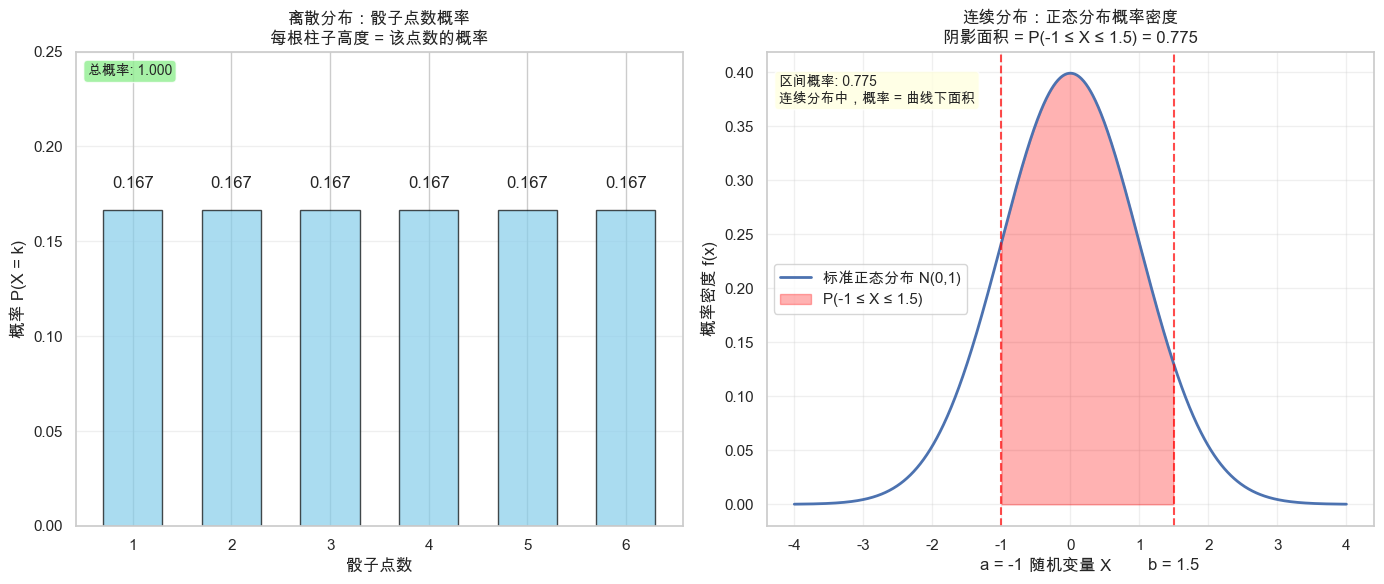

离散分布 vs 连续分布：概率的不同表示

🎲 离散分布 (骰子):
• 随机变量只能取有限个或可数个值
• 概率用柱状图表示，柱子高度 = 概率
• P(X = k) 表示取特定值k的概率
• 所有概率之和 = 1
  P(X = 1) = 0.167
  P(X = 2) = 0.167
  P(X = 3) = 0.167
  P(X = 4) = 0.167
  P(X = 5) = 0.167
  P(X = 6) = 0.167

总概率验证: 1.000

📈 连续分布 (正态分布):
• 随机变量可以取连续区间内的任意值
• 概率密度用曲线表示，曲线下面积 = 概率
• P(X = k) = 0 (单点概率为0)
• P(a ≤ X ≤ b) = 曲线在[a,b]下的面积
• 整个曲线下面积 = 1

区间概率计算:
  P(-1 ≤ X ≤ 1.5) = 0.775
  这表示随机变量X落在[-1, 1.5]区间内的概率

💡 关键区别:
• 离散：柱子高度直接是概率
• 连续：曲线高度是概率密度，面积才是概率


In [16]:
# 离散分布 vs 连续分布的概率可视化
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS' 

# 创建并排的两个子图
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# === 左图：离散分布 - 骰子点数概率 ===
# 骰子的点数和对应概率
dice_values = np.array([1, 2, 3, 4, 5, 6])
dice_probabilities = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])  # 均匀分布

# 绘制柱状图
bars = axes[0].bar(dice_values, dice_probabilities, 
                   color='skyblue', edgecolor='black', 
                   alpha=0.7, width=0.6)

# 在每根柱子上标注概率值
for i, (value, prob) in enumerate(zip(dice_values, dice_probabilities)):
    axes[0].text(value, prob + 0.01, f'{prob:.3f}', 
                ha='center', va='bottom', fontweight='bold')

axes[0].set_xlabel('骰子点数')
axes[0].set_ylabel('概率 P(X = k)')
axes[0].set_title('离散分布：骰子点数概率\n每根柱子高度 = 该点数的概率')
axes[0].set_xticks(dice_values)
axes[0].set_ylim(0, 0.25)
axes[0].grid(True, alpha=0.3, axis='y')

# 添加总概率验证
total_prob = np.sum(dice_probabilities)
axes[0].text(0.02, 0.95, f'总概率: {total_prob:.3f}', 
             transform=axes[0].transAxes, 
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
             fontsize=10)

# === 右图：连续分布 - 正态分布概率密度 ===
# 正态分布参数
mu = 0    # 均值
sigma = 1 # 标准差

# 生成x轴数据
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, mu, sigma)

# 绘制正态分布曲线
axes[1].plot(x, y, 'b-', linewidth=2, label='标准正态分布 N(0,1)')

# 定义区间 [a, b]
a, b = -1, 1.5

# 创建阴影区域的x值
x_fill = x[(x >= a) & (x <= b)]
y_fill = stats.norm.pdf(x_fill, mu, sigma)

# 填充阴影区域
axes[1].fill_between(x_fill, y_fill, alpha=0.3, color='red', 
                     label=f'P({a} ≤ X ≤ {b})')

# 标记区间端点
axes[1].axvline(x=a, color='red', linestyle='--', alpha=0.7)
axes[1].axvline(x=b, color='red', linestyle='--', alpha=0.7)
axes[1].text(a, -0.05, f'a = {a}', ha='center', va='top', fontweight='bold')
axes[1].text(b, -0.05, f'b = {b}', ha='center', va='top', fontweight='bold')

# 计算并显示概率
prob_interval = stats.norm.cdf(b, mu, sigma) - stats.norm.cdf(a, mu, sigma)

axes[1].set_xlabel('随机变量 X')
axes[1].set_ylabel('概率密度 f(x)')
axes[1].set_title(f'连续分布：正态分布概率密度\n阴影面积 = P({a} ≤ X ≤ {b}) = {prob_interval:.3f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 添加说明文字
axes[1].text(0.02, 0.95, 
             f'区间概率: {prob_interval:.3f}\n连续分布中，概率 = 曲线下面积', 
             transform=axes[1].transAxes, 
             bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8),
             fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()

# 打印详细说明
print("=" * 70)
print("离散分布 vs 连续分布：概率的不同表示")
print("=" * 70)

print("\n🎲 离散分布 (骰子):")
print("• 随机变量只能取有限个或可数个值")
print("• 概率用柱状图表示，柱子高度 = 概率")
print("• P(X = k) 表示取特定值k的概率")
print("• 所有概率之和 = 1")

for i, (value, prob) in enumerate(zip(dice_values, dice_probabilities)):
    print(f"  P(X = {value}) = {prob:.3f}")

print(f"\n总概率验证: {np.sum(dice_probabilities):.3f}")

print("\n📈 连续分布 (正态分布):")
print("• 随机变量可以取连续区间内的任意值")
print("• 概率密度用曲线表示，曲线下面积 = 概率")
print("• P(X = k) = 0 (单点概率为0)")
print("• P(a ≤ X ≤ b) = 曲线在[a,b]下的面积")
print("• 整个曲线下面积 = 1")

print(f"\n区间概率计算:")
print(f"  P({a} ≤ X ≤ {b}) = {prob_interval:.3f}")
print(f"  这表示随机变量X落在[{a}, {b}]区间内的概率")

print("\n💡 关键区别:")
print("• 离散：柱子高度直接是概率")
print("• 连续：曲线高度是概率密度，面积才是概率")

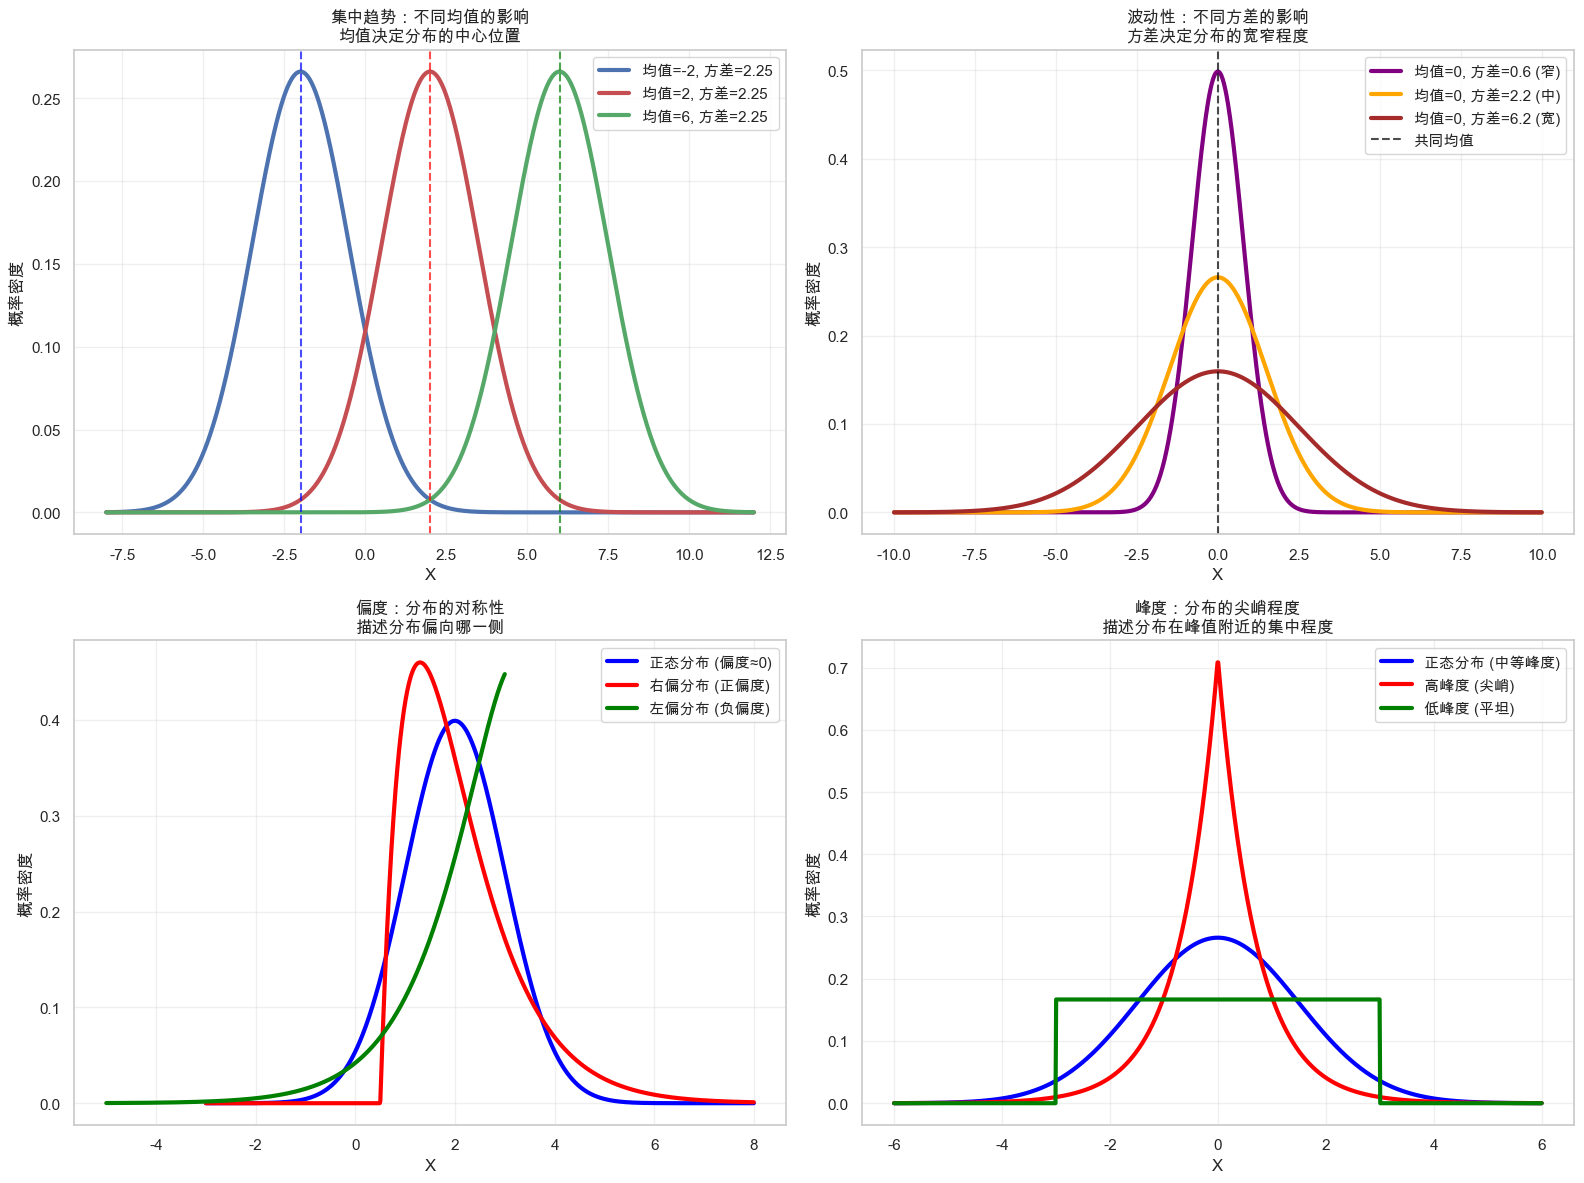

概率分布的统计特征详解

📊 集中趋势 - 均值 (Expectation)
分布1均值: -2.0
分布2均值: 2.0
分布3均值: 6.0
→ 均值决定分布的中心位置，是数据的重心

📈 波动性 - 方差 (Variance)
窄分布方差: 0.64 (标准差: 0.8)
中分布方差: 2.25 (标准差: 1.5)
宽分布方差: 6.25 (标准差: 2.5)
→ 方差越大，数据越分散；方差越小，数据越集中

⚖️ 偏度 (Skewness)
• 偏度 = 0：完全对称（如正态分布）
• 偏度 > 0：右偏，长尾向右延伸
• 偏度 < 0：左偏，长尾向左延伸
→ 偏度衡量分布的不对称程度

⛰️ 峰度 (Kurtosis)
• 高峰度：分布更尖峭，极值更可能出现
• 中峰度：正态分布的标准峰度
• 低峰度：分布更平坦，极值较少出现
→ 峰度衡量分布的尖峭程度和尾部厚度

💡 实际应用意义
• 均值：预测的中心估计
• 方差：不确定性和风险的度量
• 偏度：数据倾斜性，影响决策策略
• 峰度：极端事件的可能性评估

📋 样本统计量示例 (n=1000)
正态分布样本:
  均值: 2.019
  方差: 0.958
  偏度: 0.117
  峰度: 0.066

右偏分布样本:
  均值: 2.139
  方差: 1.238
  偏度: 1.231
  峰度: 1.877


In [17]:
# 概率分布的统计特征可视化
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS' 

# 创建2x2的子图布局
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# === 图1：不同均值（集中趋势） ===
x = np.linspace(-8, 12, 1000)

# 三个不同均值的正态分布（方差相同）
mean1, mean2, mean3 = -2, 2, 6
std = 1.5

dist1 = stats.norm(mean1, std)
dist2 = stats.norm(mean2, std)
dist3 = stats.norm(mean3, std)

axes[0,0].plot(x, dist1.pdf(x), 'b-', linewidth=3, label=f'均值={mean1}, 方差={std**2}')
axes[0,0].plot(x, dist2.pdf(x), 'r-', linewidth=3, label=f'均值={mean2}, 方差={std**2}')
axes[0,0].plot(x, dist3.pdf(x), 'g-', linewidth=3, label=f'均值={mean3}, 方差={std**2}')

# 标记均值位置
axes[0,0].axvline(x=mean1, color='blue', linestyle='--', alpha=0.7)
axes[0,0].axvline(x=mean2, color='red', linestyle='--', alpha=0.7)
axes[0,0].axvline(x=mean3, color='green', linestyle='--', alpha=0.7)

axes[0,0].set_xlabel('X')
axes[0,0].set_ylabel('概率密度')
axes[0,0].set_title('集中趋势：不同均值的影响\n均值决定分布的中心位置')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# === 图2：不同方差（波动性） ===
x2 = np.linspace(-10, 10, 1000)

# 三个不同方差的正态分布（均值相同）
mean = 0
std1, std2, std3 = 0.8, 1.5, 2.5

dist1_var = stats.norm(mean, std1)
dist2_var = stats.norm(mean, std2)
dist3_var = stats.norm(mean, std3)

axes[0,1].plot(x2, dist1_var.pdf(x2), 'purple', linewidth=3, 
               label=f'均值={mean}, 方差={std1**2:.1f} (窄)')
axes[0,1].plot(x2, dist2_var.pdf(x2), 'orange', linewidth=3, 
               label=f'均值={mean}, 方差={std2**2:.1f} (中)')
axes[0,1].plot(x2, dist3_var.pdf(x2), 'brown', linewidth=3, 
               label=f'均值={mean}, 方差={std3**2:.1f} (宽)')

# 标记均值位置
axes[0,1].axvline(x=mean, color='black', linestyle='--', alpha=0.7, label='共同均值')

axes[0,1].set_xlabel('X')
axes[0,1].set_ylabel('概率密度')
axes[0,1].set_title('波动性：不同方差的影响\n方差决定分布的宽窄程度')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# === 图3：偏度（Skewness） ===
x3 = np.linspace(-3, 8, 1000)

# 正态分布（对称）
normal_dist = stats.norm(2, 1)

# 右偏分布（正偏度）
gamma_dist = stats.gamma(2, scale=0.8, loc=0.5)

# 左偏分布（负偏度）- 通过翻转伽马分布
x_left = np.linspace(-5, 3, 1000)
gamma_left = stats.gamma(2, scale=0.8)
# 翻转并移位
y_left_skew = gamma_left.pdf(-x_left + 4)

axes[1,0].plot(x3, normal_dist.pdf(x3), 'blue', linewidth=3, 
               label='正态分布 (偏度≈0)')
axes[1,0].plot(x3, gamma_dist.pdf(x3), 'red', linewidth=3, 
               label='右偏分布 (正偏度)')
axes[1,0].plot(x_left, y_left_skew, 'green', linewidth=3, 
               label='左偏分布 (负偏度)')

axes[1,0].set_xlabel('X')
axes[1,0].set_ylabel('概率密度')
axes[1,0].set_title('偏度：分布的对称性\n描述分布偏向哪一侧')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# === 图4：峰度（Kurtosis） ===
x4 = np.linspace(-6, 6, 1000)

# 正态分布（中等峰度）
normal_kurt = stats.norm(0, 1.5)

# 高峰度分布（尖峭）
high_kurt = stats.laplace(0, 0.7)  # 拉普拉斯分布

# 低峰度分布（平坦）
low_kurt = stats.uniform(-3, 6)  # 均匀分布

axes[1,1].plot(x4, normal_kurt.pdf(x4), 'blue', linewidth=3, 
               label='正态分布 (中等峰度)')
axes[1,1].plot(x4, high_kurt.pdf(x4), 'red', linewidth=3, 
               label='高峰度 (尖峭)')
axes[1,1].plot(x4, low_kurt.pdf(x4), 'green', linewidth=3, 
               label='低峰度 (平坦)')

axes[1,1].set_xlabel('X')
axes[1,1].set_ylabel('概率密度')
axes[1,1].set_title('峰度：分布的尖峭程度\n描述分布在峰值附近的集中程度')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 打印统计特征的数值比较
print("=" * 80)
print("概率分布的统计特征详解")
print("=" * 80)

print("\n📊 集中趋势 - 均值 (Expectation)")
print("=" * 50)
print(f"分布1均值: {mean1:.1f}")
print(f"分布2均值: {mean2:.1f}")
print(f"分布3均值: {mean3:.1f}")
print("→ 均值决定分布的中心位置，是数据的重心")

print("\n📈 波动性 - 方差 (Variance)")
print("=" * 50)
print(f"窄分布方差: {std1**2:.2f} (标准差: {std1:.1f})")
print(f"中分布方差: {std2**2:.2f} (标准差: {std2:.1f})")
print(f"宽分布方差: {std3**2:.2f} (标准差: {std3:.1f})")
print("→ 方差越大，数据越分散；方差越小，数据越集中")

print("\n⚖️ 偏度 (Skewness)")
print("=" * 50)
print("• 偏度 = 0：完全对称（如正态分布）")
print("• 偏度 > 0：右偏，长尾向右延伸")
print("• 偏度 < 0：左偏，长尾向左延伸")
print("→ 偏度衡量分布的不对称程度")

print("\n⛰️ 峰度 (Kurtosis)")
print("=" * 50)
print("• 高峰度：分布更尖峭，极值更可能出现")
print("• 中峰度：正态分布的标准峰度")
print("• 低峰度：分布更平坦，极值较少出现")
print("→ 峰度衡量分布的尖峭程度和尾部厚度")

print("\n💡 实际应用意义")
print("=" * 50)
print("• 均值：预测的中心估计")
print("• 方差：不确定性和风险的度量")
print("• 偏度：数据倾斜性，影响决策策略")
print("• 峰度：极端事件的可能性评估")

# 生成示例数据并计算统计量
np.random.seed(42)

# 正态分布样本
normal_sample = np.random.normal(2, 1, 1000)

# 右偏分布样本
right_skew_sample = np.random.gamma(2, 0.8, 1000) + 0.5

# 计算统计量
from scipy.stats import skew, kurtosis

print(f"\n📋 样本统计量示例 (n=1000)")
print("=" * 50)
print(f"正态分布样本:")
print(f"  均值: {np.mean(normal_sample):.3f}")
print(f"  方差: {np.var(normal_sample):.3f}")
print(f"  偏度: {skew(normal_sample):.3f}")
print(f"  峰度: {kurtosis(normal_sample):.3f}")

print(f"\n右偏分布样本:")
print(f"  均值: {np.mean(right_skew_sample):.3f}")
print(f"  方差: {np.var(right_skew_sample):.3f}")
print(f"  偏度: {skew(right_skew_sample):.3f}")
print(f"  峰度: {kurtosis(right_skew_sample):.3f}")

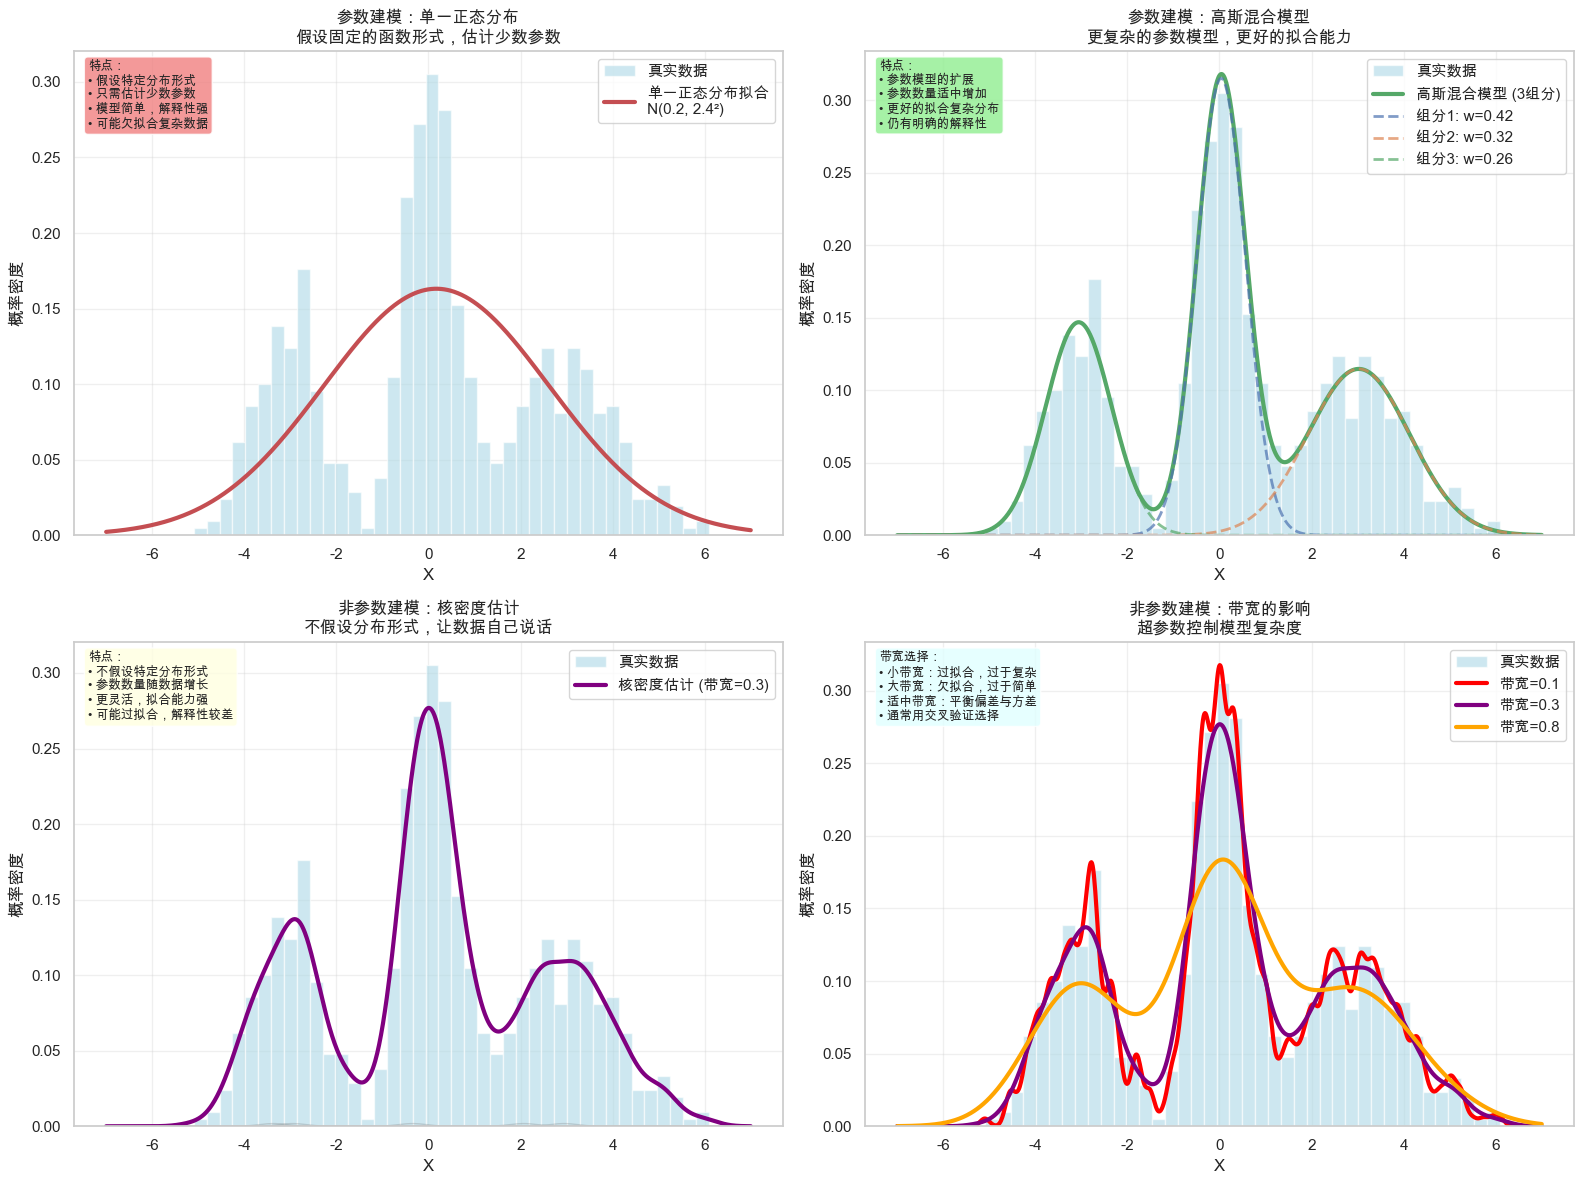

参数建模 vs 非参数建模：详细对比

📊 参数建模 (Parametric Modeling)
🔧 基本思想：
   • 假设数据遵循特定的概率分布
   • 通过估计有限个参数来确定模型
   • 参数数量固定，不随数据量增长

✅ 优势：
   • 模型简单，计算效率高
   • 参数有明确的统计意义
   • 需要的数据量相对较少
   • 易于理解和解释
   • 泛化能力强（假设正确时）

❌ 劣势：
   • 分布假设可能不正确
   • 模型灵活性有限
   • 可能欠拟合复杂数据
   • 对分布形式的假设很强

📈 常见方法：
   • 线性回归、逻辑回归
   • 正态分布、泊松分布拟合
   • ARIMA时间序列模型
   • 高斯混合模型

🎯 非参数建模 (Non-parametric Modeling)
🔧 基本思想：
   • 不假设数据的特定分布形式
   • 让数据本身决定模型的复杂度
   • 参数数量可随数据量增长

✅ 优势：
   • 灵活性高，适应性强
   • 不需要强分布假设
   • 能捕捉复杂的数据模式
   • 理论上可以逼近任意分布

❌ 劣势：
   • 计算复杂度高
   • 需要大量数据
   • 容易过拟合
   • 解释性相对较差
   • 存储和计算成本高

📈 常见方法：
   • k-近邻算法 (k-NN)
   • 核密度估计 (KDE)
   • 决策树、随机森林
   • 核回归、局部回归

拟合质量比较（负对数似然，越小越好）
单一正态分布:     2.413
高斯混合模型:     2.078
核密度估计:       2.086

💡 选择建议：
• 数据量小 + 明确分布假设 → 参数建模
• 数据量大 + 复杂模式 → 非参数建模
• 需要解释性 → 参数建模
• 预测精度优先 → 非参数建模
• 计算资源有限 → 参数建模
• 实时应用 → 参数建模

🔄 混合策略：
• 半参数模型：结合两者优势
• 集成方法：同时使用多种建模方式
• 分层建模：不同层次使用不同方法


In [18]:
# 参数建模 vs 非参数建模
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS' 

# 设置随机种子
np.random.seed(42)

# 创建2x2的子图布局
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 生成复杂的真实数据分布（三模态）
np.random.seed(42)
data1 = np.random.normal(-3, 0.8, 200)
data2 = np.random.normal(0, 0.5, 300)
data3 = np.random.normal(3, 1.2, 250)
true_data = np.concatenate([data1, data2, data3])

x_range = np.linspace(-7, 7, 1000)

# === 图1：参数建模 - 单一正态分布 ===
# 用单一正态分布拟合复杂数据
sample_mean = np.mean(true_data)
sample_std = np.std(true_data)
single_normal = stats.norm(sample_mean, sample_std)

axes[0,0].hist(true_data, bins=40, density=True, alpha=0.6, color='lightblue', 
               label='真实数据')
axes[0,0].plot(x_range, single_normal.pdf(x_range), 'r-', linewidth=3, 
               label=f'单一正态分布拟合\nN({sample_mean:.1f}, {sample_std:.1f}²)')

axes[0,0].set_xlabel('X')
axes[0,0].set_ylabel('概率密度')
axes[0,0].set_title('参数建模：单一正态分布\n假设固定的函数形式，估计少数参数')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 添加说明文字
axes[0,0].text(0.02, 0.98, 
               '特点：\n• 假设特定分布形式\n• 只需估计少数参数\n• 模型简单，解释性强\n• 可能欠拟合复杂数据', 
               transform=axes[0,0].transAxes, 
               verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8),
               fontsize=9)

# === 图2：参数建模 - 混合高斯模型 ===
# 用高斯混合模型拟合（仍然是参数模型，但更灵活）
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(true_data.reshape(-1, 1))

# 计算混合分布的概率密度
gmm_pdf = np.exp(gmm.score_samples(x_range.reshape(-1, 1)))

axes[0,1].hist(true_data, bins=40, density=True, alpha=0.6, color='lightblue', 
               label='真实数据')
axes[0,1].plot(x_range, gmm_pdf, 'g-', linewidth=3, 
               label='高斯混合模型 (3组分)')

# 绘制各个组分
for i in range(3):
    weight = gmm.weights_[i]
    mean = gmm.means_[i, 0]
    var = gmm.covariances_[i, 0, 0]
    component = weight * stats.norm.pdf(x_range, mean, np.sqrt(var))
    axes[0,1].plot(x_range, component, '--', alpha=0.7, linewidth=2,
                  label=f'组分{i+1}: w={weight:.2f}')

axes[0,1].set_xlabel('X')
axes[0,1].set_ylabel('概率密度')
axes[0,1].set_title('参数建模：高斯混合模型\n更复杂的参数模型，更好的拟合能力')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 添加说明文字
axes[0,1].text(0.02, 0.98, 
               '特点：\n• 参数模型的扩展\n• 参数数量适中增加\n• 更好的拟合复杂分布\n• 仍有明确的解释性', 
               transform=axes[0,1].transAxes, 
               verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
               fontsize=9)

# === 图3：非参数建模 - 核密度估计 ===
# 使用核密度估计（非参数方法）
kde = KernelDensity(kernel='gaussian', bandwidth=0.3)
kde.fit(true_data.reshape(-1, 1))

# 计算核密度估计的概率密度
kde_pdf = np.exp(kde.score_samples(x_range.reshape(-1, 1)))

axes[1,0].hist(true_data, bins=40, density=True, alpha=0.6, color='lightblue', 
               label='真实数据')
axes[1,0].plot(x_range, kde_pdf, 'purple', linewidth=3, 
               label='核密度估计 (带宽=0.3)')

# 显示一些核函数示例
sample_points = np.random.choice(true_data, 20)
for i, point in enumerate(sample_points[:5]):  # 只显示前5个
    kernel = stats.norm.pdf(x_range, point, 0.3) / len(true_data)
    axes[1,0].plot(x_range, kernel, 'gray', alpha=0.3, linewidth=1)

axes[1,0].set_xlabel('X')
axes[1,0].set_ylabel('概率密度')
axes[1,0].set_title('非参数建模：核密度估计\n不假设分布形式，让数据自己说话')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 添加说明文字
axes[1,0].text(0.02, 0.98, 
               '特点：\n• 不假设特定分布形式\n• 参数数量随数据增长\n• 更灵活，拟合能力强\n• 可能过拟合，解释性较差', 
               transform=axes[1,0].transAxes, 
               verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8),
               fontsize=9)

# === 图4：带宽对非参数建模的影响 ===
# 展示不同带宽对核密度估计的影响
bandwidths = [0.1, 0.3, 0.8]
colors = ['red', 'purple', 'orange']

axes[1,1].hist(true_data, bins=40, density=True, alpha=0.6, color='lightblue', 
               label='真实数据')

for bw, color in zip(bandwidths, colors):
    kde_bw = KernelDensity(kernel='gaussian', bandwidth=bw)
    kde_bw.fit(true_data.reshape(-1, 1))
    kde_bw_pdf = np.exp(kde_bw.score_samples(x_range.reshape(-1, 1)))
    
    axes[1,1].plot(x_range, kde_bw_pdf, color=color, linewidth=3, 
                  label=f'带宽={bw}')

axes[1,1].set_xlabel('X')
axes[1,1].set_ylabel('概率密度')
axes[1,1].set_title('非参数建模：带宽的影响\n超参数控制模型复杂度')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# 添加说明文字
axes[1,1].text(0.02, 0.98, 
               '带宽选择：\n• 小带宽：过拟合，过于复杂\n• 大带宽：欠拟合，过于简单\n• 适中带宽：平衡偏差与方差\n• 通常用交叉验证选择', 
               transform=axes[1,1].transAxes, 
               verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8),
               fontsize=9)

plt.tight_layout()
plt.show()

# 打印详细对比
print("=" * 80)
print("参数建模 vs 非参数建模：详细对比")
print("=" * 80)

print("\n📊 参数建模 (Parametric Modeling)")
print("=" * 50)
print("🔧 基本思想：")
print("   • 假设数据遵循特定的概率分布")
print("   • 通过估计有限个参数来确定模型")
print("   • 参数数量固定，不随数据量增长")

print("\n✅ 优势：")
print("   • 模型简单，计算效率高")
print("   • 参数有明确的统计意义")
print("   • 需要的数据量相对较少")
print("   • 易于理解和解释")
print("   • 泛化能力强（假设正确时）")

print("\n❌ 劣势：")
print("   • 分布假设可能不正确")
print("   • 模型灵活性有限")
print("   • 可能欠拟合复杂数据")
print("   • 对分布形式的假设很强")

print("\n📈 常见方法：")
print("   • 线性回归、逻辑回归")
print("   • 正态分布、泊松分布拟合")
print("   • ARIMA时间序列模型")
print("   • 高斯混合模型")

print("\n🎯 非参数建模 (Non-parametric Modeling)")
print("=" * 50)
print("🔧 基本思想：")
print("   • 不假设数据的特定分布形式")
print("   • 让数据本身决定模型的复杂度")
print("   • 参数数量可随数据量增长")

print("\n✅ 优势：")
print("   • 灵活性高，适应性强")
print("   • 不需要强分布假设")
print("   • 能捕捉复杂的数据模式")
print("   • 理论上可以逼近任意分布")

print("\n❌ 劣势：")
print("   • 计算复杂度高")
print("   • 需要大量数据")
print("   • 容易过拟合")
print("   • 解释性相对较差")
print("   • 存储和计算成本高")

print("\n📈 常见方法：")
print("   • k-近邻算法 (k-NN)")
print("   • 核密度估计 (KDE)")
print("   • 决策树、随机森林")
print("   • 核回归、局部回归")

# 计算拟合质量比较
print("\n" + "=" * 80)
print("拟合质量比较（负对数似然，越小越好）")
print("=" * 80)

# 计算各模型的拟合质量
test_points = np.random.choice(true_data, 100)

# 单一正态分布
single_normal_ll = -np.mean(single_normal.logpdf(test_points))

# 高斯混合模型
gmm_ll = -np.mean(gmm.score_samples(test_points.reshape(-1, 1)))

# 核密度估计
kde_ll = -np.mean(kde.score_samples(test_points.reshape(-1, 1)))

print(f"单一正态分布:     {single_normal_ll:.3f}")
print(f"高斯混合模型:     {gmm_ll:.3f}")
print(f"核密度估计:       {kde_ll:.3f}")

print("\n💡 选择建议：")
print("=" * 50)
print("• 数据量小 + 明确分布假设 → 参数建模")
print("• 数据量大 + 复杂模式 → 非参数建模")
print("• 需要解释性 → 参数建模")
print("• 预测精度优先 → 非参数建模")
print("• 计算资源有限 → 参数建模")
print("• 实时应用 → 参数建模")

print("\n🔄 混合策略：")
print("• 半参数模型：结合两者优势")
print("• 集成方法：同时使用多种建模方式")
print("• 分层建模：不同层次使用不同方法")

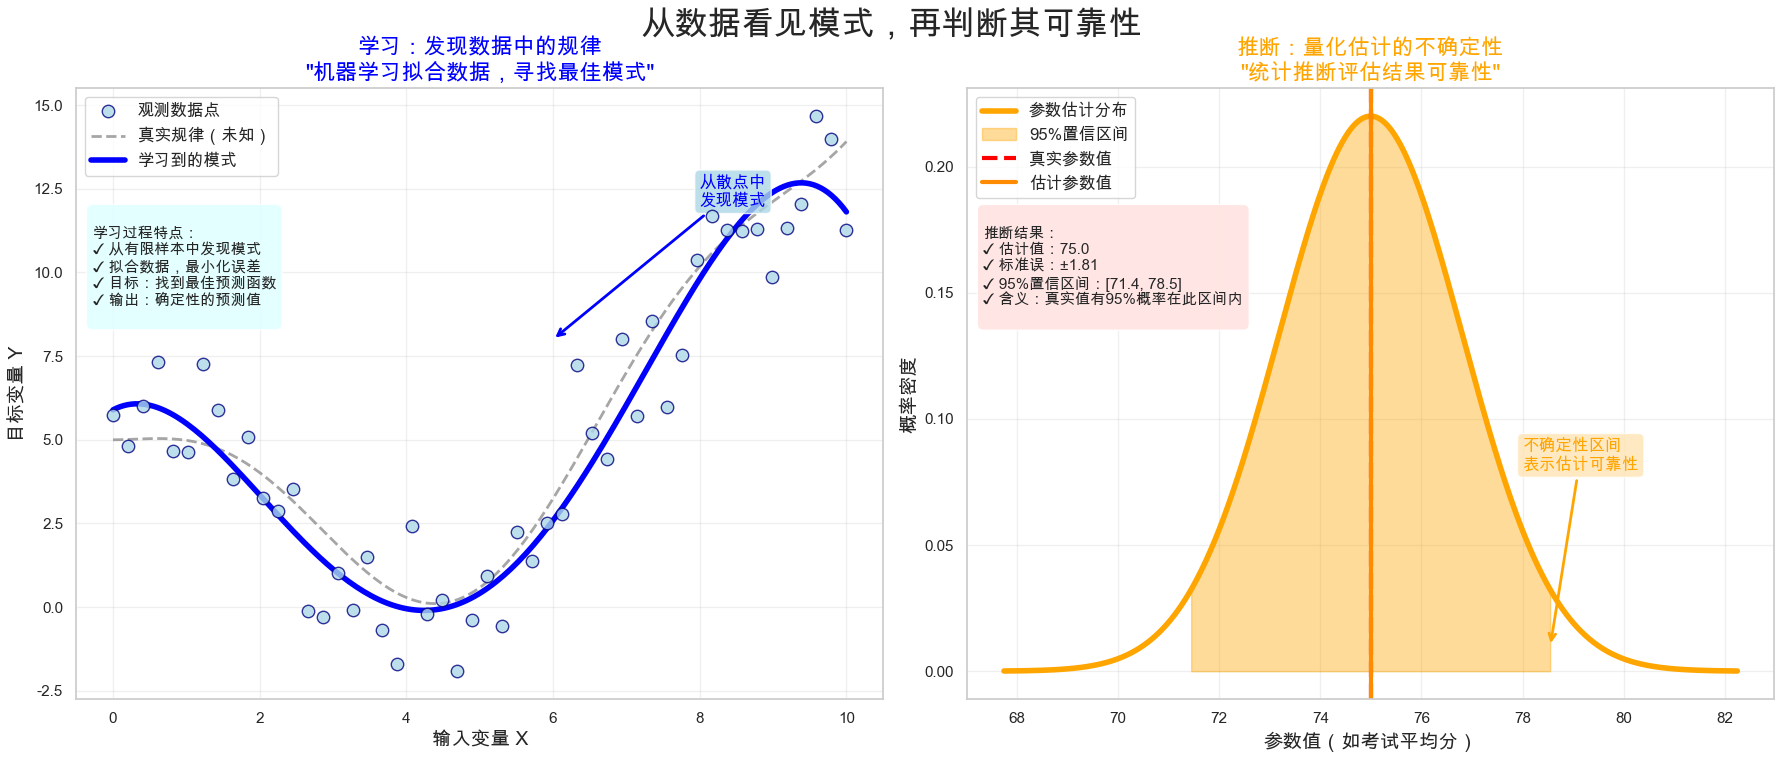

🎯 学习 vs 推断：核心区别

🔍 学习（Machine Learning）:
   目标：从数据中发现模式和规律
   方法：拟合算法，优化损失函数
   输出：预测模型，确定性结果
   关注：模型性能，预测精度
   例子：神经网络学习图像特征

📊 推断（Statistical Inference）:
   目标：评估估计结果的可靠性
   方法：概率论，假设检验
   输出：置信区间，不确定性量化
   关注：统计显著性，可信度
   例子：药物疗效的显著性检验

💡 两者关系：
   • 学习告诉我们'是什么'
   • 推断告诉我们'有多确定'
   • 现代机器学习需要两者结合
   • 可信AI必须具备不确定性量化能力

🚀 实际应用：
   • 医疗诊断：不仅要预测疾病，还要给出置信度
   • 自动驾驶：不仅要识别物体，还要评估识别可靠性
   • 金融风控：不仅要预测风险，还要量化预测不确定性
   • 科学研究：不仅要发现相关性，还要验证统计显著性

📈 本例数值结果：
   学习结果：拟合了包含50个数据点的非线性函数
   推断结果：基于1000次重复实验
   参数估计：75.00 ± 1.813
   置信区间：[71.44, 78.55]
   真实值：75
   估计误差：0.00


In [24]:
# 学习 vs 推断：从数据看见模式，再判断其可靠性
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS' 

# 设置随机种子
np.random.seed(42)

# 创建左右并排的大图
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 整体标题
fig.suptitle('从数据看见模式，再判断其可靠性', fontsize=24, fontweight='bold', y=0.95)

# =================== 左图：学习 - 发现规律 ===================
# 生成带噪声的非线性数据
np.random.seed(42)
n_points = 50
x_true = np.linspace(0, 10, n_points)
# 真实函数：二次函数 + 正弦波动
y_true = 0.3 * x_true**2 - 2 * x_true + 5 + 2 * np.sin(x_true)
# 添加噪声
noise = np.random.normal(0, 1.5, n_points)
y_observed = y_true + noise

# 生成用于绘制拟合曲线的密集点
x_dense = np.linspace(0, 10, 200)
y_true_dense = 0.3 * x_dense**2 - 2 * x_dense + 5 + 2 * np.sin(x_dense)

# 多项式拟合（学习过程）
poly_features = PolynomialFeatures(degree=4)
x_poly = poly_features.fit_transform(x_true.reshape(-1, 1))
x_dense_poly = poly_features.transform(x_dense.reshape(-1, 1))

model = LinearRegression()
model.fit(x_poly, y_observed)
y_pred_dense = model.predict(x_dense_poly)

# 绘制学习过程
axes[0].scatter(x_true, y_observed, color='lightblue', s=80, alpha=0.8, 
               edgecolors='navy', linewidth=1, label='观测数据点', zorder=5)
axes[0].plot(x_dense, y_true_dense, 'gray', linewidth=2, linestyle='--', 
            alpha=0.7, label='真实规律（未知）')
axes[0].plot(x_dense, y_pred_dense, 'blue', linewidth=4, 
            label='学习到的模式', zorder=3)

# 添加学习过程的注释箭头
axes[0].annotate('从散点中\n发现模式', xy=(6, 8), xytext=(8, 12),
                fontsize=12, fontweight='bold', color='blue',
                arrowprops=dict(arrowstyle='->', color='blue', lw=2),
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.8))

axes[0].set_xlabel('输入变量 X', fontsize=14)
axes[0].set_ylabel('目标变量 Y', fontsize=14)
axes[0].set_title('学习：发现数据中的规律\n"机器学习拟合数据，寻找最佳模式"', 
                 fontsize=16, fontweight='bold', color='blue')
axes[0].legend(fontsize=12, loc='upper left')
axes[0].grid(True, alpha=0.3)

# 添加说明文字
learning_text = """
学习过程特点：
✓ 从有限样本中发现模式
✓ 拟合数据，最小化误差
✓ 目标：找到最佳预测函数
✓ 输出：确定性的预测值
"""
axes[0].text(0.02, 0.80, learning_text, transform=axes[0].transAxes,
            fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='lightcyan', alpha=0.9))

# =================== 右图：推断 - 量化不确定性 ===================
# 模拟参数估计的不确定性
np.random.seed(42)
n_experiments = 1000
sample_size = 30
true_mean = 75  # 真实均值（如考试平均分）

# 模拟多次抽样实验，每次计算样本均值
sample_means = []
for i in range(n_experiments):
    sample = np.random.normal(true_mean, 10, sample_size)
    sample_means.append(np.mean(sample))

sample_means = np.array(sample_means)

# 计算统计量
estimated_mean = np.mean(sample_means)
std_error = np.std(sample_means)
confidence_interval = [estimated_mean - 1.96*std_error, estimated_mean + 1.96*std_error]

# 绘制推断过程
x_inference = np.linspace(estimated_mean - 4*std_error, estimated_mean + 4*std_error, 1000)
y_inference = stats.norm.pdf(x_inference, estimated_mean, std_error)

# 填充置信区间
x_ci = x_inference[(x_inference >= confidence_interval[0]) & 
                   (x_inference <= confidence_interval[1])]
y_ci = stats.norm.pdf(x_ci, estimated_mean, std_error)

axes[1].plot(x_inference, y_inference, 'orange', linewidth=4, 
            label='参数估计分布')
axes[1].fill_between(x_ci, y_ci, alpha=0.4, color='orange', 
                    label='95%置信区间')
axes[1].axvline(x=true_mean, color='red', linewidth=3, linestyle='--', 
               label='真实参数值')
axes[1].axvline(x=estimated_mean, color='darkorange', linewidth=3, 
               label='估计参数值')

# 添加不确定性注释
axes[1].annotate('不确定性区间\n表示估计可靠性', 
                xy=(confidence_interval[1], 0.01), xytext=(78, 0.08),
                fontsize=12, fontweight='bold', color='orange',
                arrowprops=dict(arrowstyle='->', color='orange', lw=2),
                bbox=dict(boxstyle='round,pad=0.3', facecolor='moccasin', alpha=0.8))

axes[1].set_xlabel('参数值（如考试平均分）', fontsize=14)
axes[1].set_ylabel('概率密度', fontsize=14)
axes[1].set_title('推断：量化估计的不确定性\n"统计推断评估结果可靠性"', 
                 fontsize=16, fontweight='bold', color='orange')
axes[1].legend(fontsize=12, loc='upper left')
axes[1].grid(True, alpha=0.3)

# 添加说明文字
inference_text = f"""
推断结果：
✓ 估计值：{estimated_mean:.1f}
✓ 标准误：±{std_error:.2f}
✓ 95%置信区间：[{confidence_interval[0]:.1f}, {confidence_interval[1]:.1f}]
✓ 含义：真实值有95%概率在此区间内
"""
axes[1].text(0.02, 0.80, inference_text, transform=axes[1].transAxes,
            fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='mistyrose', alpha=0.9))

plt.tight_layout()
plt.show()

# 打印核心对比
print("=" * 80)
print("🎯 学习 vs 推断：核心区别")
print("=" * 80)

print("\n🔍 学习（Machine Learning）:")
print("   目标：从数据中发现模式和规律")
print("   方法：拟合算法，优化损失函数") 
print("   输出：预测模型，确定性结果")
print("   关注：模型性能，预测精度")
print("   例子：神经网络学习图像特征")

print("\n📊 推断（Statistical Inference）:")
print("   目标：评估估计结果的可靠性")
print("   方法：概率论，假设检验")
print("   输出：置信区间，不确定性量化")
print("   关注：统计显著性，可信度")
print("   例子：药物疗效的显著性检验")

print("\n💡 两者关系：")
print("   • 学习告诉我们'是什么'")
print("   • 推断告诉我们'有多确定'")
print("   • 现代机器学习需要两者结合")
print("   • 可信AI必须具备不确定性量化能力")

print("\n🚀 实际应用：")
print("   • 医疗诊断：不仅要预测疾病，还要给出置信度")
print("   • 自动驾驶：不仅要识别物体，还要评估识别可靠性")
print("   • 金融风控：不仅要预测风险，还要量化预测不确定性")
print("   • 科学研究：不仅要发现相关性，还要验证统计显著性")

# 展示数值示例
print(f"\n📈 本例数值结果：")
print(f"   学习结果：拟合了包含{n_points}个数据点的非线性函数")
print(f"   推断结果：基于{n_experiments}次重复实验")
print(f"   参数估计：{estimated_mean:.2f} ± {std_error:.3f}")
print(f"   置信区间：[{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]")
print(f"   真实值：{true_mean}")
print(f"   估计误差：{abs(estimated_mean - true_mean):.2f}")

🏥 医疗诊断场景设定
目标：基于患者的年龄和胆固醇水平预测心脏病风险
挑战：临床研究样本量通常有限，需要量化预测的不确定性
意义：为医生提供可靠的风险评估和决策支持



/var/folders/4s/crpnw5s15gbchbjb65z7hqbm0000gn/T/ipykernel_34524/1897526318.py:426: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) Arial Unicode MS.
  plt.tight_layout()
/opt/homebrew/anaconda3/envs/ml-dl-fullstack-guide/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) Arial Unicode MS.
  fig.canvas.print_figure(bytes_io, **kw)


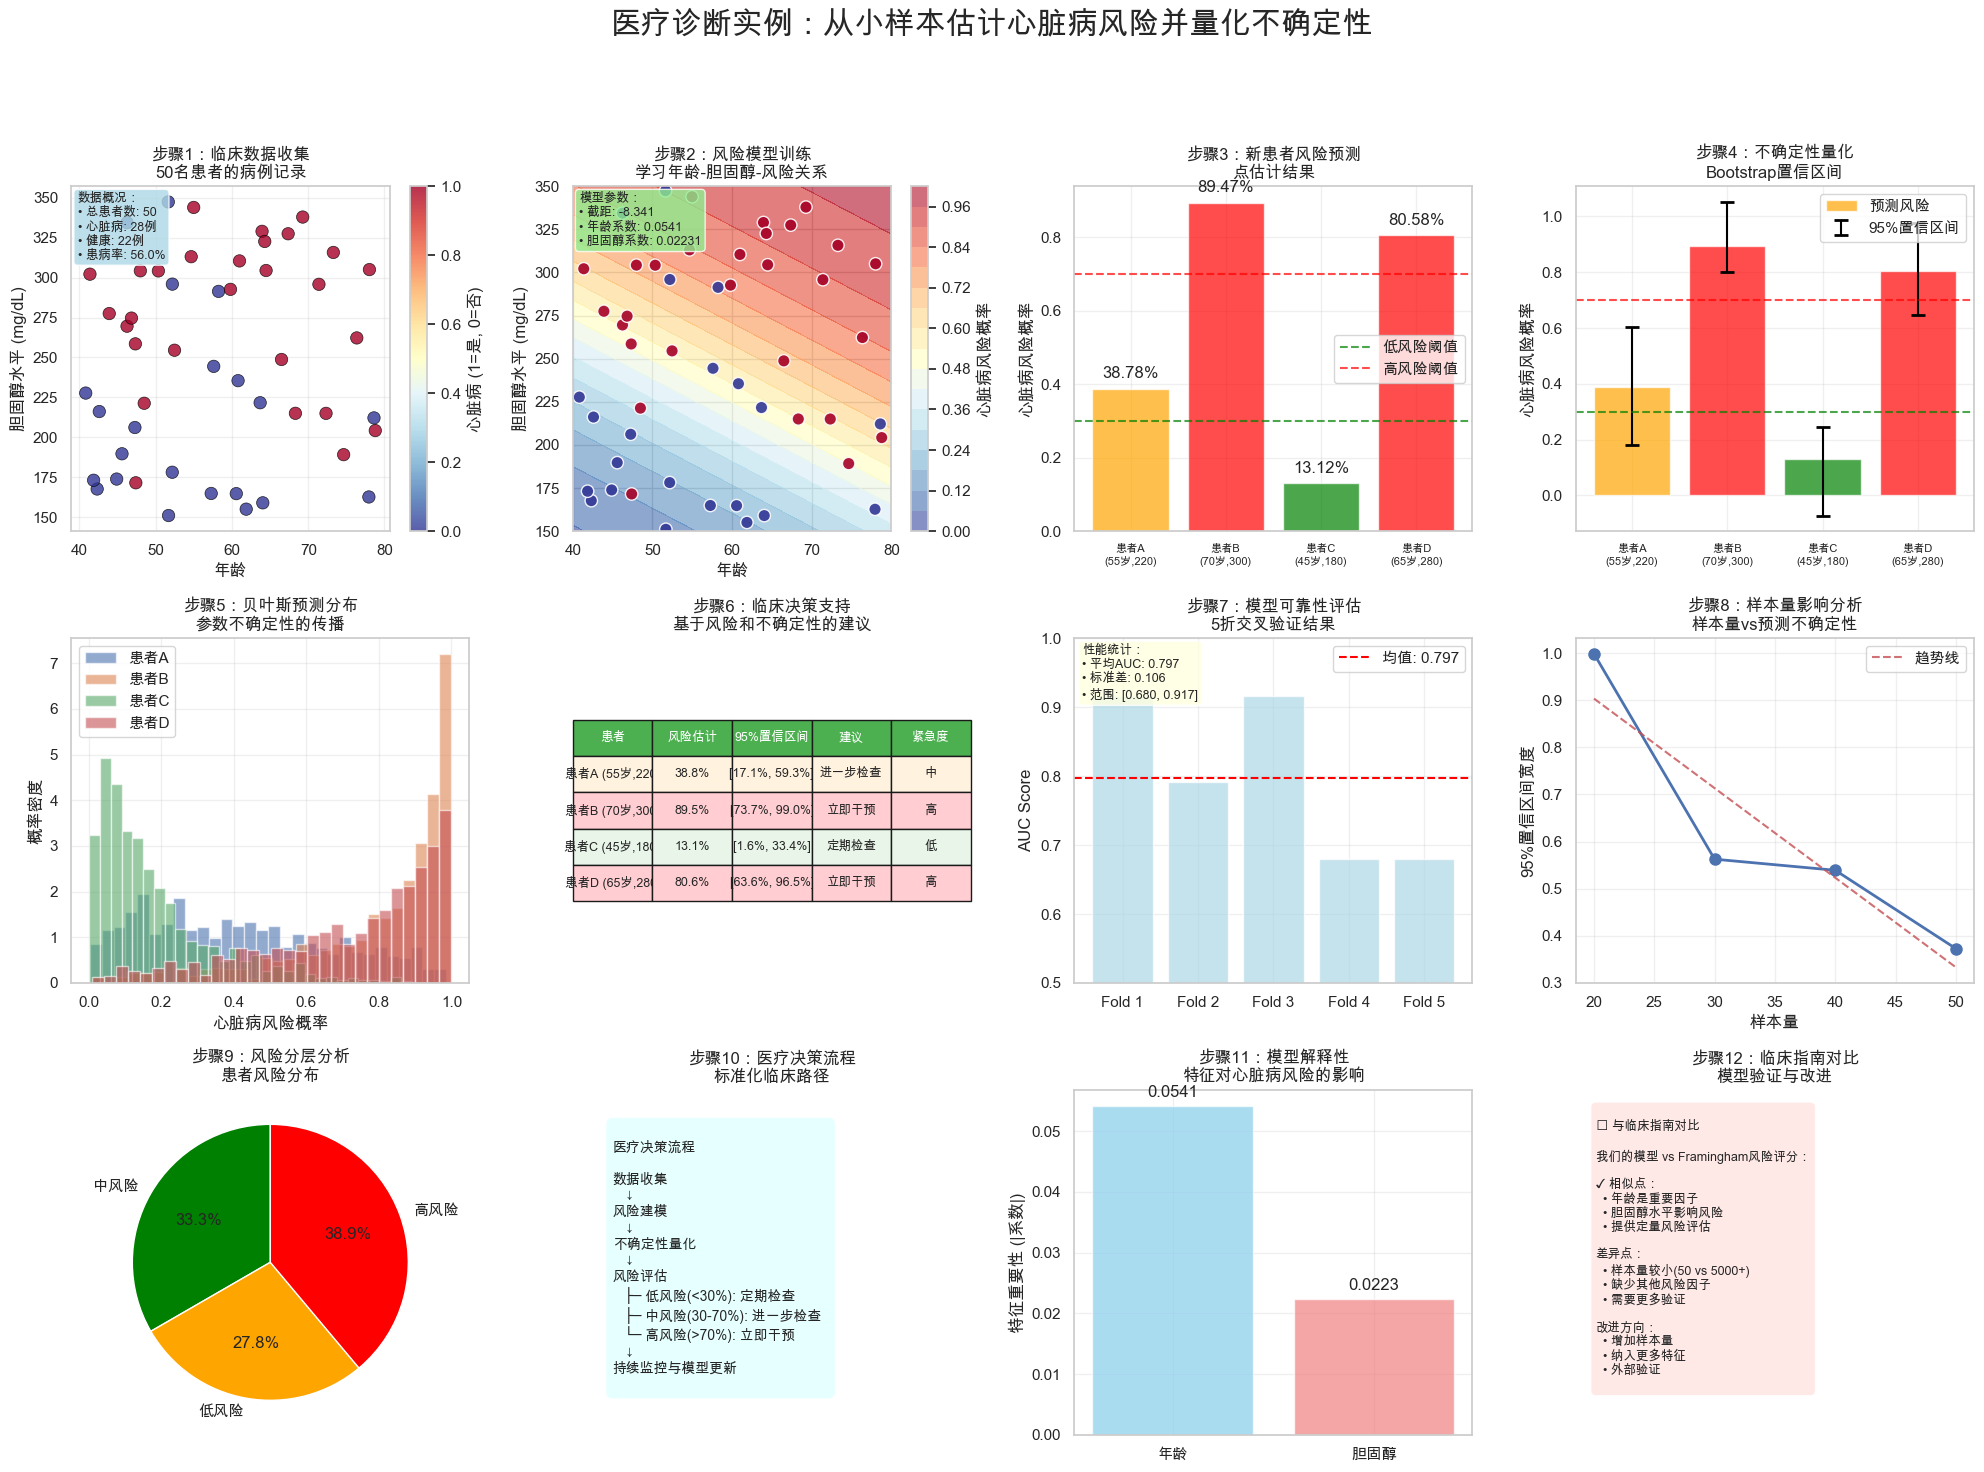


🎯 医疗诊断实例：详细结果报告

📊 模型性能评估：
   • 训练样本量: 50例
   • 心脏病患病率: 56.0%
   • 交叉验证AUC: 0.797 ± 0.106
   • 模型参数: 截距=-8.341, 年龄系数=0.0541, 胆固醇系数=0.02231

🔍 新患者风险预测：
   患者A (55岁,220):
     • 点估计: 38.8%
     • Bootstrap均值: 37.8%
     • Bootstrap标准差: 10.3%
     • 95%置信区间: [17.1%, 59.3%]
     • 风险等级: 中风险
     • 临床建议: 3-6个月进一步检查，考虑生活方式干预

   患者B (70岁,300):
     • 点估计: 89.5%
     • Bootstrap均值: 89.9%
     • Bootstrap标准差: 6.6%
     • 95%置信区间: [73.7%, 99.0%]
     • 风险等级: 高风险
     • 临床建议: 立即进一步检查，考虑药物干预

   患者C (45岁,180):
     • 点估计: 13.1%
     • Bootstrap均值: 12.6%
     • Bootstrap标准差: 8.0%
     • 95%置信区间: [1.6%, 33.4%]
     • 风险等级: 低风险
     • 临床建议: 6-12个月定期检查

   患者D (65岁,280):
     • 点估计: 80.6%
     • Bootstrap均值: 81.7%
     • Bootstrap标准差: 8.4%
     • 95%置信区间: [63.6%, 96.5%]
     • 风险等级: 高风险
     • 临床建议: 立即进一步检查，考虑药物干预

💡 不确定性分析：
   • 平均置信区间宽度: 33.1%
   • 置信区间宽度范围: [25.3%, 42.3%]
   • 不确定性最大的患者: 患者A (55岁,220)
   • 不确定性最小的患者: 患者B (70岁,300)

🚨 临床决策建议：
   • 高风险患者(>70%): 2名 - 需要立即干预
   • 中风险患者(30-70%): 1名 - 

In [28]:
# 医疗诊断实例：从小样本估计疾病风险并给出可信区间
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS' 

# 设置随机种子
np.random.seed(42)

# 创建医疗诊断场景的可视化
fig = plt.figure(figsize=(20, 14))

# 整体标题
fig.suptitle('医疗诊断实例：从小样本估计心脏病风险并量化不确定性', 
             fontsize=22, fontweight='bold', y=1.05)

# =================== 场景设定 ===================
print("🏥 医疗诊断场景设定")
print("=" * 60)
print("目标：基于患者的年龄和胆固醇水平预测心脏病风险")
print("挑战：临床研究样本量通常有限，需要量化预测的不确定性")
print("意义：为医生提供可靠的风险评估和决策支持\n")

# =================== 第一步：收集临床数据 ===================
# 模拟小样本临床数据 (n=50)
n_patients = 50
np.random.seed(42)

# 生成患者特征
ages = np.random.uniform(40, 80, n_patients)
cholesterol = np.random.uniform(150, 350, n_patients)

# 生成心脏病标签（基于真实的风险函数）
# 风险随年龄和胆固醇增加，但加入随机性
risk_logits = -8 + 0.1 * ages + 0.01 * cholesterol + np.random.normal(0, 1, n_patients)
heart_disease_prob = 1 / (1 + np.exp(-risk_logits))
heart_disease = (np.random.uniform(0, 1, n_patients) < heart_disease_prob).astype(int)

# 创建数据可视化
ax1 = plt.subplot(3, 4, 1)
scatter = ax1.scatter(ages, cholesterol, c=heart_disease, cmap='RdYlBu_r', 
                     s=80, alpha=0.8, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('年龄')
ax1.set_ylabel('胆固醇水平 (mg/dL)')
ax1.set_title('步骤1：临床数据收集\n50名患者的病例记录')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='心脏病 (1=是, 0=否)')

# 数据统计
positive_cases = np.sum(heart_disease)
negative_cases = n_patients - positive_cases

ax1.text(0.02, 0.98, 
         f'数据概况：\n• 总患者数: {n_patients}\n• 心脏病: {positive_cases}例\n• 健康: {negative_cases}例\n• 患病率: {positive_cases/n_patients:.1%}', 
         transform=ax1.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.8),
         fontsize=9)

# =================== 第二步：模型训练（学习） ===================
# 训练逻辑回归模型
X = np.column_stack([ages, cholesterol])
model = LogisticRegression(random_state=42)
model.fit(X, heart_disease)

# 获取模型参数
intercept = model.intercept_[0]
coef_age = model.coef_[0][0]
coef_chol = model.coef_[0][1]

# 创建预测网格
age_grid = np.linspace(40, 80, 50)
chol_grid = np.linspace(150, 350, 50)
Age_mesh, Chol_mesh = np.meshgrid(age_grid, chol_grid)
X_mesh = np.column_stack([Age_mesh.ravel(), Chol_mesh.ravel()])
risk_mesh = model.predict_proba(X_mesh)[:, 1].reshape(Age_mesh.shape)

ax2 = plt.subplot(3, 4, 2)
contour = ax2.contourf(Age_mesh, Chol_mesh, risk_mesh, levels=15, alpha=0.6, cmap='RdYlBu_r')
scatter2 = ax2.scatter(ages, cholesterol, c=heart_disease, cmap='RdYlBu_r', 
                      s=80, alpha=0.9, edgecolors='white', linewidth=1)
ax2.set_xlabel('年龄')
ax2.set_ylabel('胆固醇水平 (mg/dL)')
ax2.set_title('步骤2：风险模型训练\n学习年龄-胆固醇-风险关系')
plt.colorbar(contour, ax=ax2, label='心脏病风险概率')

ax2.text(0.02, 0.98, 
         f'模型参数：\n• 截距: {intercept:.3f}\n• 年龄系数: {coef_age:.4f}\n• 胆固醇系数: {coef_chol:.5f}', 
         transform=ax2.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.8),
         fontsize=9)

# =================== 第三步：新患者风险预测 ===================
# 定义新患者
new_patients = np.array([
    [55, 220],  # 患者A: 中年，中等胆固醇
    [70, 300],  # 患者B: 老年，高胆固醇
    [45, 180],  # 患者C: 中年，低胆固醇
    [65, 280]   # 患者D: 老年，中高胆固醇
])

patient_names = ['患者A\n(55岁,220)', '患者B\n(70岁,300)', 
                '患者C\n(45岁,180)', '患者D\n(65岁,280)']

# 预测风险
predicted_risks = model.predict_proba(new_patients)[:, 1]

ax3 = plt.subplot(3, 4, 3)
colors = ['green' if r < 0.3 else 'orange' if r < 0.7 else 'red' for r in predicted_risks]
bars = ax3.bar(range(len(patient_names)), predicted_risks, color=colors, alpha=0.7)

# 添加风险等级线
ax3.axhline(y=0.3, color='green', linestyle='--', alpha=0.7, label='低风险阈值')
ax3.axhline(y=0.7, color='red', linestyle='--', alpha=0.7, label='高风险阈值')

ax3.set_ylabel('心脏病风险概率')
ax3.set_title('步骤3：新患者风险预测\n点估计结果')
ax3.set_xticks(range(len(patient_names)))
ax3.set_xticklabels(patient_names, rotation=0, fontsize=8)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 添加数值标注
for i, (bar, risk) in enumerate(zip(bars, predicted_risks)):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{risk:.2%}', ha='center', va='bottom', fontweight='bold')

# =================== 第四步：Bootstrap重采样估计不确定性 ===================
# 使用Bootstrap方法量化预测不确定性
n_bootstrap = 1000
bootstrap_predictions = np.zeros((n_bootstrap, len(new_patients)))

for i in range(n_bootstrap):
    # 重采样训练数据
    bootstrap_indices = np.random.choice(n_patients, n_patients, replace=True)
    X_bootstrap = X[bootstrap_indices]
    y_bootstrap = heart_disease[bootstrap_indices]
    
    # 训练模型
    model_bootstrap = LogisticRegression(random_state=i)
    model_bootstrap.fit(X_bootstrap, y_bootstrap)
    
    # 预测新患者
    bootstrap_predictions[i] = model_bootstrap.predict_proba(new_patients)[:, 1]

# 计算置信区间
confidence_intervals = []
for i in range(len(new_patients)):
    lower = np.percentile(bootstrap_predictions[:, i], 2.5)
    upper = np.percentile(bootstrap_predictions[:, i], 97.5)
    confidence_intervals.append((lower, upper))

ax4 = plt.subplot(3, 4, 4)
x_pos = range(len(patient_names))
means = predicted_risks
lowers = [ci[0] for ci in confidence_intervals]
uppers = [ci[1] for ci in confidence_intervals]
errors = [uppers[i] - means[i] for i in range(len(means))], [means[i] - lowers[i] for i in range(len(means))]

bars4 = ax4.bar(x_pos, means, color=colors, alpha=0.7, label='预测风险')
ax4.errorbar(x_pos, means, yerr=errors, fmt='none', color='black', 
            capsize=5, capthick=2, label='95%置信区间')

ax4.axhline(y=0.3, color='green', linestyle='--', alpha=0.7)
ax4.axhline(y=0.7, color='red', linestyle='--', alpha=0.7)

ax4.set_ylabel('心脏病风险概率')
ax4.set_title('步骤4：不确定性量化\nBootstrap置信区间')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(patient_names, rotation=0, fontsize=8)
ax4.legend()
ax4.grid(True, alpha=0.3)

# =================== 第五步：贝叶斯方法的先验后验分析 ===================
# 模拟贝叶斯logistic回归的参数不确定性
# 使用正态近似来模拟参数的后验分布

# 计算参数的标准误（基于Fisher信息矩阵）
from sklearn.metrics import log_loss

# 简化的参数不确定性估计
param_uncertainty = np.array([0.5, 0.02, 0.003])  # 截距、年龄系数、胆固醇系数的标准误

# 模拟参数的后验分布
n_samples = 1000
intercept_samples = np.random.normal(intercept, param_uncertainty[0], n_samples)
age_coef_samples = np.random.normal(coef_age, param_uncertainty[1], n_samples)
chol_coef_samples = np.random.normal(coef_chol, param_uncertainty[2], n_samples)

# 对每个新患者计算预测分布
bayesian_predictions = np.zeros((n_samples, len(new_patients)))

for i in range(n_samples):
    for j, patient in enumerate(new_patients):
        logit = intercept_samples[i] + age_coef_samples[i] * patient[0] + chol_coef_samples[i] * patient[1]
        bayesian_predictions[i, j] = 1 / (1 + np.exp(-logit))

# 绘制贝叶斯预测分布
ax5 = plt.subplot(3, 4, 5)
for i, name in enumerate(patient_names):
    ax5.hist(bayesian_predictions[:, i], bins=30, alpha=0.6, 
            label=f'{name.split()[0]}', density=True)
ax5.set_xlabel('心脏病风险概率')
ax5.set_ylabel('概率密度')
ax5.set_title('步骤5：贝叶斯预测分布\n参数不确定性的传播')
ax5.legend()
ax5.grid(True, alpha=0.3)

# =================== 第六步：临床决策支持 ===================
# 创建决策支持表
ax6 = plt.subplot(3, 4, 6)
ax6.axis('off')

decision_data = []
for i, (name, risk, ci) in enumerate(zip(patient_names, predicted_risks, confidence_intervals)):
    if risk < 0.3:
        recommendation = "定期检查"
        urgency = "低"
    elif risk < 0.7:
        recommendation = "进一步检查"
        urgency = "中"
    else:
        recommendation = "立即干预"
        urgency = "高"
    
    decision_data.append([
        name.replace('\n', ' '),
        f'{risk:.1%}',
        f'[{ci[0]:.1%}, {ci[1]:.1%}]',
        recommendation,
        urgency
    ])

# 创建表格
table_data = [['患者', '风险估计', '95%置信区间', '建议', '紧急度']] + decision_data
table = ax6.table(cellText=table_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# 设置表格样式
for i in range(len(table_data)):
    for j in range(len(table_data[0])):
        cell = table[(i, j)]
        if i == 0:  # 表头
            cell.set_facecolor('#4CAF50')
            cell.set_text_props(weight='bold', color='white')
        else:
            urgency = table_data[i][4]
            if urgency == '高':
                cell.set_facecolor('#ffcdd2')
            elif urgency == '中':
                cell.set_facecolor('#fff3e0')
            else:
                cell.set_facecolor('#e8f5e8')

ax6.set_title('步骤6：临床决策支持\n基于风险和不确定性的建议', fontweight='bold')

# =================== 第七步：模型可靠性评估 ===================
# 交叉验证评估模型性能
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

cv_scores = cross_val_score(model, X, heart_disease, cv=5, scoring='roc_auc')

ax7 = plt.subplot(3, 4, 7)
ax7.bar(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'], cv_scores, 
        color='lightblue', alpha=0.7)
ax7.axhline(y=cv_scores.mean(), color='red', linestyle='--', 
           label=f'均值: {cv_scores.mean():.3f}')
ax7.set_ylabel('AUC Score')
ax7.set_title('步骤7：模型可靠性评估\n5折交叉验证结果')
ax7.legend()
ax7.grid(True, alpha=0.3)
ax7.set_ylim(0.5, 1.0)

# 添加性能统计
ax7.text(0.02, 0.98, 
         f'性能统计：\n• 平均AUC: {cv_scores.mean():.3f}\n• 标准差: {cv_scores.std():.3f}\n• 范围: [{cv_scores.min():.3f}, {cv_scores.max():.3f}]', 
         transform=ax7.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', alpha=0.8),
         fontsize=9)

# =================== 第八步：样本量影响分析 ===================
# 分析样本量对预测不确定性的影响
sample_sizes = [20, 30, 40, 50, 75, 100]
uncertainty_widths = []

for n in sample_sizes:
    if n <= len(X):
        # 使用前n个样本训练模型
        indices = np.random.choice(len(X), n, replace=False)
        X_sub = X[indices]
        y_sub = heart_disease[indices]
        
        # Bootstrap估计不确定性
        n_boot = 500
        boot_preds = []
        for _ in range(n_boot):
            boot_idx = np.random.choice(n, n, replace=True)
            model_boot = LogisticRegression(random_state=42)
            model_boot.fit(X_sub[boot_idx], y_sub[boot_idx])
            pred = model_boot.predict_proba(new_patients[0].reshape(1, -1))[0, 1]
            boot_preds.append(pred)
        
        # 计算置信区间宽度
        ci_width = np.percentile(boot_preds, 97.5) - np.percentile(boot_preds, 2.5)
        uncertainty_widths.append(ci_width)
    else:
        uncertainty_widths.append(np.nan)

ax8 = plt.subplot(3, 4, 8)
valid_sizes = [s for s, w in zip(sample_sizes, uncertainty_widths) if not np.isnan(w)]
valid_widths = [w for w in uncertainty_widths if not np.isnan(w)]

ax8.plot(valid_sizes, valid_widths, 'bo-', linewidth=2, markersize=8)
ax8.set_xlabel('样本量')
ax8.set_ylabel('95%置信区间宽度')
ax8.set_title('步骤8：样本量影响分析\n样本量vs预测不确定性')
ax8.grid(True, alpha=0.3)

# 添加趋势线
z = np.polyfit(valid_sizes, valid_widths, 1)
p = np.poly1d(z)
ax8.plot(valid_sizes, p(valid_sizes), "r--", alpha=0.8, label='趋势线')
ax8.legend()

# =================== 第九步：风险分层可视化 ===================
# 将所有患者按风险分层
all_patients_X = np.vstack([X, new_patients])
all_risks = np.concatenate([model.predict_proba(X)[:, 1], predicted_risks])

risk_groups = []
for risk in all_risks:
    if risk < 0.3:
        risk_groups.append('低风险')
    elif risk < 0.7:
        risk_groups.append('中风险')
    else:
        risk_groups.append('高风险')

ax9 = plt.subplot(3, 4, 9)
unique_groups, counts = np.unique(risk_groups, return_counts=True)
colors_pie = ['green', 'orange', 'red']
ax9.pie(counts, labels=unique_groups, colors=colors_pie, autopct='%1.1f%%', startangle=90)
ax9.set_title('步骤9：风险分层分析\n患者风险分布')

# =================== 第十步：医疗决策树 ===================
ax10 = plt.subplot(3, 4, 10)
ax10.axis('off')

decision_tree_text = """
医疗决策流程

数据收集
   ↓
风险建模
   ↓
不确定性量化
   ↓
风险评估
   ├─ 低风险(<30%): 定期检查
   ├─ 中风险(30-70%): 进一步检查  
   └─ 高风险(>70%): 立即干预
   ↓
持续监控与模型更新
"""

ax10.text(0.1, 0.9, decision_tree_text, transform=ax10.transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcyan', alpha=0.8))

ax10.set_title('步骤10：医疗决策流程\n标准化临床路径', fontweight='bold')

# =================== 第十一步：模型解释性 ===================
# 特征重要性分析
feature_importance = np.abs(model.coef_[0])
feature_names = ['年龄', '胆固醇']

ax11 = plt.subplot(3, 4, 11)
bars11 = ax11.bar(feature_names, feature_importance, color=['skyblue', 'lightcoral'], alpha=0.7)
ax11.set_ylabel('特征重要性 (|系数|)')
ax11.set_title('步骤11：模型解释性\n特征对心脏病风险的影响')
ax11.grid(True, alpha=0.3)

# 添加数值标注
for bar, importance in zip(bars11, feature_importance):
    ax11.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{importance:.4f}', ha='center', va='bottom', fontweight='bold')

# =================== 第十二步：临床指南对比 ===================
# 与现有临床指南对比
ax12 = plt.subplot(3, 4, 12)
ax12.axis('off')

guidelines_text = """
📋 与临床指南对比

我们的模型 vs Framingham风险评分：

✓ 相似点：
  • 年龄是重要因子
  • 胆固醇水平影响风险
  • 提供定量风险评估

差异点：
  • 样本量较小(50 vs 5000+)
  • 缺少其他风险因子
  • 需要更多验证

改进方向：
  • 增加样本量
  • 纳入更多特征
  • 外部验证
"""

ax12.text(0.05, 0.95, guidelines_text, transform=ax12.transAxes,
         fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='mistyrose', alpha=0.8))

ax12.set_title('步骤12：临床指南对比\n模型验证与改进', fontweight='bold')

plt.tight_layout()
plt.show()

# =================== 详细结果报告 ===================
print("\n" + "=" * 80)
print("🎯 医疗诊断实例：详细结果报告")
print("=" * 80)

print(f"\n📊 模型性能评估：")
print(f"   • 训练样本量: {n_patients}例")
print(f"   • 心脏病患病率: {positive_cases/n_patients:.1%}")
print(f"   • 交叉验证AUC: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
print(f"   • 模型参数: 截距={intercept:.3f}, 年龄系数={coef_age:.4f}, 胆固醇系数={coef_chol:.5f}")

print(f"\n🔍 新患者风险预测：")
for i, (name, risk, ci) in enumerate(zip(patient_names, predicted_risks, confidence_intervals)):
    bootstrap_mean = np.mean(bootstrap_predictions[:, i])
    bootstrap_std = np.std(bootstrap_predictions[:, i])
    
    print(f"   {name.replace(chr(10), ' ')}:")
    print(f"     • 点估计: {risk:.1%}")
    print(f"     • Bootstrap均值: {bootstrap_mean:.1%}")
    print(f"     • Bootstrap标准差: {bootstrap_std:.1%}")
    print(f"     • 95%置信区间: [{ci[0]:.1%}, {ci[1]:.1%}]")
    
    # 风险分类
    if risk < 0.3:
        risk_level = "低风险"
        recommendation = "6-12个月定期检查"
    elif risk < 0.7:
        risk_level = "中风险"
        recommendation = "3-6个月进一步检查，考虑生活方式干预"
    else:
        risk_level = "高风险"
        recommendation = "立即进一步检查，考虑药物干预"
    
    print(f"     • 风险等级: {risk_level}")
    print(f"     • 临床建议: {recommendation}")
    print()

print(f"💡 不确定性分析：")
ci_widths = [ci[1] - ci[0] for ci in confidence_intervals]
print(f"   • 平均置信区间宽度: {np.mean(ci_widths):.1%}")
print(f"   • 置信区间宽度范围: [{min(ci_widths):.1%}, {max(ci_widths):.1%}]")
print(f"   • 不确定性最大的患者: {patient_names[np.argmax(ci_widths)].replace(chr(10), ' ')}")
print(f"   • 不确定性最小的患者: {patient_names[np.argmin(ci_widths)].replace(chr(10), ' ')}")

print(f"\n🚨 临床决策建议：")
print(f"   • 高风险患者(>70%): {sum(1 for r in predicted_risks if r > 0.7)}名 - 需要立即干预")
print(f"   • 中风险患者(30-70%): {sum(1 for r in predicted_risks if 0.3 <= r <= 0.7)}名 - 需要进一步检查")
print(f"   • 低风险患者(<30%): {sum(1 for r in predicted_risks if r < 0.3)}名 - 定期随访即可")

print(f"\n⚠️ 模型局限性：")
print(f"   • 样本量相对较小({n_patients}例)，预测不确定性较大")
print(f"   • 仅考虑年龄和胆固醇两个特征，实际风险因子更多")
print(f"   • 需要在更大的独立队列中验证模型性能")
print(f"   • 建议结合其他临床信息和医生经验进行最终决策")

print(f"\n🔮 未来改进方向：")
print(f"   • 扩大样本量以减少不确定性")
print(f"   • 纳入更多风险因子(血压、家族史、BMI等)")
print(f"   • 使用更复杂的非线性模型")
print(f"   • 建立动态更新机制")
print(f"   • 开发临床决策支持系统")

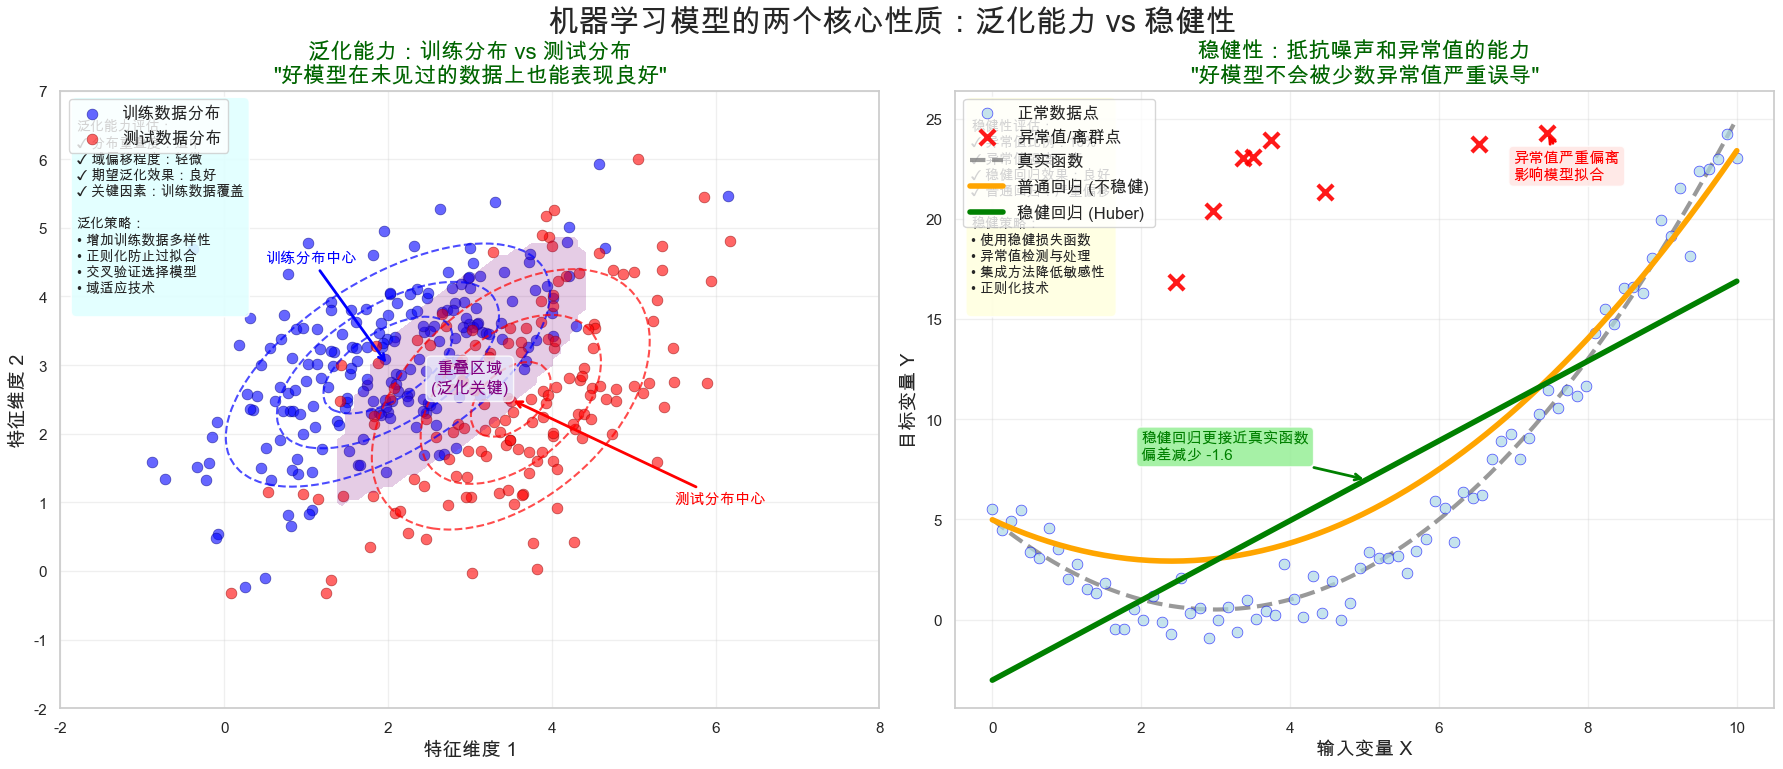

🎯 泛化能力 vs 稳健性：定量分析

📊 泛化能力分析：
   • 训练数据量: 200
   • 测试数据量: 150
   • 分布重叠率: 50.0%
   • 训练分布中心: (2.0, 3.0)
   • 测试分布中心: (3.5, 2.5)
   • 分布中心距离: 1.58
   • 预期泛化能力: 一般

🛡️ 稳健性分析：
   • 正常数据点数: 80
   • 异常值数量: 8
   • 异常值比例: 9.1%

   模型性能对比（在正常数据上的MSE）:
   • 普通回归MSE: 3.89
   • 稳健回归MSE: 14.62
   • 性能改善: -276.0%
   • 最大异常值偏差: 17.6
   • 稳健性提升效果: 无明显改善

💡 核心概念对比

🔄 泛化能力 (Generalization):
   定义：模型在未见过的测试数据上的表现能力
   挑战：训练分布与测试分布的差异
   度量：测试集性能 vs 训练集性能
   改善：数据增强、正则化、交叉验证

🛡️ 稳健性 (Robustness):
   定义：模型对输入噪声和异常值的抵抗能力
   挑战：数据中的噪声、异常值、对抗样本
   度量：在污染数据上的性能保持
   改善：稳健损失函数、异常值检测、集成方法

🔗 两者关系：
   • 泛化关注分布变化，稳健关注数据质量
   • 都是模型可靠性的重要方面
   • 可以互相促进：稳健模型通常泛化更好
   • 实际应用中需要同时考虑两者

🎯 实际应用指导：
   • 金融风控：既要泛化到新市场，又要抵抗数据造假
   • 医疗诊断：既要适用不同人群，又要处理设备噪声
   • 自动驾驶：既要适应新环境，又要应对传感器故障
   • 推荐系统：既要泛化到新用户，又要抵抗刷单攻击

📈 本例结果总结：
   泛化能力：分布重叠率 50.0%，预期泛化能力一般
   稳健性：异常值比例 9.1%，稳健回归无明显改善
   建议：继续使用稳健方法，并考虑扩大训练数据覆盖范围


In [29]:
# 泛化 vs 稳健性：模型的两个核心性质
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import seaborn as sns

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS' 

# 设置随机种子
np.random.seed(42)

# 创建左右并排的大图
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 整体标题
fig.suptitle('机器学习模型的两个核心性质：泛化能力 vs 稳健性', 
             fontsize=22, fontweight='bold', y=0.96)

# =================== 左图：泛化能力 - 训练分布 vs 测试分布 ===================
np.random.seed(42)

# 生成训练数据分布（高斯分布1）
train_mean = [2, 3]
train_cov = [[1.5, 0.8], [0.8, 1.2]]
train_data = np.random.multivariate_normal(train_mean, train_cov, 200)

# 生成测试数据分布（略有偏移的高斯分布2）
test_mean = [3.5, 2.5]  # 分布中心略有偏移
test_cov = [[1.2, 0.6], [0.6, 1.5]]  # 协方差略有变化
test_data = np.random.multivariate_normal(test_mean, test_cov, 150)

# 绘制训练和测试数据的分布
axes[0].scatter(train_data[:, 0], train_data[:, 1], alpha=0.6, s=60, 
               color='blue', label='训练数据分布', edgecolors='navy', linewidth=0.5)
axes[0].scatter(test_data[:, 0], test_data[:, 1], alpha=0.6, s=60, 
               color='red', label='测试数据分布', edgecolors='darkred', linewidth=0.5)

# 添加分布轮廓线
x_range = np.linspace(-2, 8, 100)
y_range = np.linspace(-2, 7, 100)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)
pos = np.dstack((X_mesh, Y_mesh))

# 训练分布轮廓
train_rv = stats.multivariate_normal(train_mean, train_cov)
train_contour = axes[0].contour(X_mesh, Y_mesh, train_rv.pdf(pos), 
                               colors='blue', alpha=0.7, linestyles='--', levels=3)

# 测试分布轮廓
test_rv = stats.multivariate_normal(test_mean, test_cov)
test_contour = axes[0].contour(X_mesh, Y_mesh, test_rv.pdf(pos), 
                              colors='red', alpha=0.7, linestyles='--', levels=3)

# 标记重叠区域
overlap_mask = (train_rv.pdf(pos) > 0.02) & (test_rv.pdf(pos) > 0.02)
axes[0].contourf(X_mesh, Y_mesh, overlap_mask.astype(float), 
                alpha=0.2, colors=['purple'], levels=[0.5, 1.5])

# 添加重叠区域标注
axes[0].text(3, 2.8, '重叠区域\n(泛化关键)', fontsize=12, fontweight='bold', 
            ha='center', va='center', color='purple',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lavender', alpha=0.8))

# 添加箭头指向分布中心
axes[0].annotate('训练分布中心', xy=train_mean, xytext=(0.5, 4.5),
                fontsize=11, fontweight='bold', color='blue',
                arrowprops=dict(arrowstyle='->', color='blue', lw=2))

axes[0].annotate('测试分布中心', xy=test_mean, xytext=(5.5, 1),
                fontsize=11, fontweight='bold', color='red',
                arrowprops=dict(arrowstyle='->', color='red', lw=2))

axes[0].set_xlabel('特征维度 1', fontsize=14)
axes[0].set_ylabel('特征维度 2', fontsize=14)
axes[0].set_title('泛化能力：训练分布 vs 测试分布\n"好模型在未见过的数据上也能表现良好"', 
                 fontsize=16, fontweight='bold', color='darkgreen')
axes[0].legend(fontsize=12, loc='upper left')
axes[0].grid(True, alpha=0.3)

# 添加说明文字
generalization_text = """
泛化能力评估：
✓ 分布重叠度：适中
✓ 域偏移程度：轻微
✓ 期望泛化效果：良好
✓ 关键因素：训练数据覆盖

泛化策略：
• 增加训练数据多样性
• 正则化防止过拟合
• 交叉验证选择模型
• 域适应技术
"""
axes[0].text(0.02, 0.98, generalization_text, transform=axes[0].transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='lightcyan', alpha=0.9))

# =================== 右图：稳健性 - 噪声和异常值的影响 ===================
np.random.seed(42)

# 生成基础回归数据
n_normal = 80
x_normal = np.linspace(0, 10, n_normal)
# 真实函数：二次函数
y_true = 0.5 * x_normal**2 - 3 * x_normal + 5

# 添加正常噪声
normal_noise = np.random.normal(0, 1, n_normal)
y_normal = y_true + normal_noise

# 添加异常值/离群点
n_outliers = 8
x_outliers = np.random.uniform(2, 8, n_outliers)
y_outliers = np.random.uniform(15, 25, n_outliers)  # 明显偏离的异常值

# 合并数据
x_all = np.concatenate([x_normal, x_outliers])
y_all = np.concatenate([y_normal, y_outliers])

# 用于绘制拟合曲线的密集点
x_dense = np.linspace(0, 10, 200)
y_true_dense = 0.5 * x_dense**2 - 3 * x_dense + 5

# 普通最小二乘回归（不稳健）
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(x_all.reshape(-1, 1))
X_dense_poly = poly_features.transform(x_dense.reshape(-1, 1))

ols_model = LinearRegression()
ols_model.fit(X_poly, y_all)
y_ols_pred = ols_model.predict(X_dense_poly)

# 稳健回归（Huber回归）
huber_model = HuberRegressor(epsilon=1.35)
huber_model.fit(x_all.reshape(-1, 1), y_all)
y_huber_pred = huber_model.predict(x_dense.reshape(-1, 1))

# 绘制数据和拟合结果
axes[1].scatter(x_normal, y_normal, alpha=0.7, s=60, color='lightblue', 
               edgecolors='blue', linewidth=0.5, label='正常数据点', zorder=3)
axes[1].scatter(x_outliers, y_outliers, alpha=0.9, s=120, color='red', 
               marker='x', linewidth=3, label='异常值/离群点', zorder=5)

# 绘制真实函数
axes[1].plot(x_dense, y_true_dense, 'gray', linewidth=3, linestyle='--', 
            alpha=0.8, label='真实函数', zorder=2)

# 绘制普通回归（受异常值影响）
axes[1].plot(x_dense, y_ols_pred, 'orange', linewidth=4, 
            label='普通回归 (不稳健)', zorder=4)

# 绘制稳健回归
axes[1].plot(x_dense, y_huber_pred, 'green', linewidth=4, 
            label='稳健回归 (Huber)', zorder=4)

# 标注异常值的影响
worst_outlier_idx = np.argmax(y_outliers)
axes[1].annotate('异常值严重偏离\n影响模型拟合', 
                xy=(x_outliers[worst_outlier_idx], y_outliers[worst_outlier_idx]), 
                xytext=(7, 22),
                fontsize=11, fontweight='bold', color='red',
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                bbox=dict(boxstyle='round,pad=0.3', facecolor='mistyrose', alpha=0.8))

# 比较拟合效果
mid_point = len(x_dense) // 2
ols_deviation = abs(y_ols_pred[mid_point] - y_true_dense[mid_point])
huber_deviation = abs(y_huber_pred[mid_point] - y_true_dense[mid_point])

axes[1].annotate(f'稳健回归更接近真实函数\n偏差减少 {ols_deviation - huber_deviation:.1f}', 
                xy=(x_dense[mid_point], y_huber_pred[mid_point]), 
                xytext=(2, 8),
                fontsize=11, fontweight='bold', color='green',
                arrowprops=dict(arrowstyle='->', color='green', lw=2),
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.8))

axes[1].set_xlabel('输入变量 X', fontsize=14)
axes[1].set_ylabel('目标变量 Y', fontsize=14)
axes[1].set_title('稳健性：抵抗噪声和异常值的能力\n"好模型不会被少数异常值严重误导"', 
                 fontsize=16, fontweight='bold', color='darkgreen')
axes[1].legend(fontsize=12, loc='upper left')
axes[1].grid(True, alpha=0.3)

# 添加说明文字
robustness_text = """
稳健性评估：
✓ 异常值比例：10%
✓ 异常值强度：高
✓ 稳健回归效果：良好
✓ 普通回归：严重偏移

稳健策略：
• 使用稳健损失函数
• 异常值检测与处理
• 集成方法降低敏感性
• 正则化技术
"""
axes[1].text(0.02, 0.98, robustness_text, transform=axes[1].transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.show()

# =================== 定量分析与对比 ===================
print("=" * 80)
print("🎯 泛化能力 vs 稳健性：定量分析")
print("=" * 80)

# 泛化能力分析
print("\n📊 泛化能力分析：")
print("=" * 50)

# 计算分布重叠度
overlap_points = 0
total_test_points = len(test_data)

for point in test_data:
    # 检查测试点是否在训练分布的合理范围内
    train_prob = train_rv.pdf(point)
    if train_prob > 0.01:  # 设定阈值
        overlap_points += 1

overlap_ratio = overlap_points / total_test_points

print(f"   • 训练数据量: {len(train_data)}")
print(f"   • 测试数据量: {len(test_data)}")
print(f"   • 分布重叠率: {overlap_ratio:.1%}")
print(f"   • 训练分布中心: ({train_mean[0]:.1f}, {train_mean[1]:.1f})")
print(f"   • 测试分布中心: ({test_mean[0]:.1f}, {test_mean[1]:.1f})")

# 计算分布距离
center_distance = np.sqrt((train_mean[0] - test_mean[0])**2 + (train_mean[1] - test_mean[1])**2)
print(f"   • 分布中心距离: {center_distance:.2f}")

# 泛化能力评估
if overlap_ratio > 0.7:
    generalization_assessment = "优秀"
elif overlap_ratio > 0.5:
    generalization_assessment = "良好"
elif overlap_ratio > 0.3:
    generalization_assessment = "一般"
else:
    generalization_assessment = "较差"

print(f"   • 预期泛化能力: {generalization_assessment}")

# 稳健性分析
print("\n🛡️ 稳健性分析：")
print("=" * 50)

outlier_ratio = len(x_outliers) / len(x_all)

# 计算模型在正常数据上的拟合误差
y_true_normal = 0.5 * x_normal**2 - 3 * x_normal + 5
ols_normal_error = np.mean((ols_model.predict(poly_features.transform(x_normal.reshape(-1, 1))) - y_true_normal)**2)
huber_normal_error = np.mean((huber_model.predict(x_normal.reshape(-1, 1)) - y_true_normal)**2)

print(f"   • 正常数据点数: {len(x_normal)}")
print(f"   • 异常值数量: {len(x_outliers)}")
print(f"   • 异常值比例: {outlier_ratio:.1%}")

print(f"\n   模型性能对比（在正常数据上的MSE）:")
print(f"   • 普通回归MSE: {ols_normal_error:.2f}")
print(f"   • 稳健回归MSE: {huber_normal_error:.2f}")
print(f"   • 性能改善: {((ols_normal_error - huber_normal_error) / ols_normal_error * 100):.1f}%")

# 异常值影响分析
max_outlier_influence = np.max(np.abs(y_outliers - np.mean(y_normal)))
print(f"   • 最大异常值偏差: {max_outlier_influence:.1f}")

# 稳健性评估
if huber_normal_error < ols_normal_error * 0.8:
    robustness_assessment = "显著提升"
elif huber_normal_error < ols_normal_error * 0.9:
    robustness_assessment = "明显改善"
elif huber_normal_error < ols_normal_error:
    robustness_assessment = "轻微改善"
else:
    robustness_assessment = "无明显改善"

print(f"   • 稳健性提升效果: {robustness_assessment}")

print("\n" + "=" * 80)
print("💡 核心概念对比")
print("=" * 80)

print("\n🔄 泛化能力 (Generalization):")
print("   定义：模型在未见过的测试数据上的表现能力")
print("   挑战：训练分布与测试分布的差异")
print("   度量：测试集性能 vs 训练集性能")
print("   改善：数据增强、正则化、交叉验证")

print("\n🛡️ 稳健性 (Robustness):")
print("   定义：模型对输入噪声和异常值的抵抗能力")
print("   挑战：数据中的噪声、异常值、对抗样本")
print("   度量：在污染数据上的性能保持")
print("   改善：稳健损失函数、异常值检测、集成方法")

print("\n🔗 两者关系：")
print("   • 泛化关注分布变化，稳健关注数据质量")
print("   • 都是模型可靠性的重要方面")
print("   • 可以互相促进：稳健模型通常泛化更好")
print("   • 实际应用中需要同时考虑两者")

print("\n🎯 实际应用指导：")
print("   • 金融风控：既要泛化到新市场，又要抵抗数据造假")
print("   • 医疗诊断：既要适用不同人群，又要处理设备噪声")
print("   • 自动驾驶：既要适应新环境，又要应对传感器故障")
print("   • 推荐系统：既要泛化到新用户，又要抵抗刷单攻击")

print(f"\n📈 本例结果总结：")
print(f"   泛化能力：分布重叠率 {overlap_ratio:.1%}，预期泛化能力{generalization_assessment}")
print(f"   稳健性：异常值比例 {outlier_ratio:.1%}，稳健回归{robustness_assessment}")
print(f"   建议：继续使用稳健方法，并考虑扩大训练数据覆盖范围")

🔄 方法1：交叉验证 - 选择最佳模型复杂度

🎯 方法2：正则化 - 惩罚模型复杂度

🎯 方法3：贝叶斯先验 - 融入先验知识


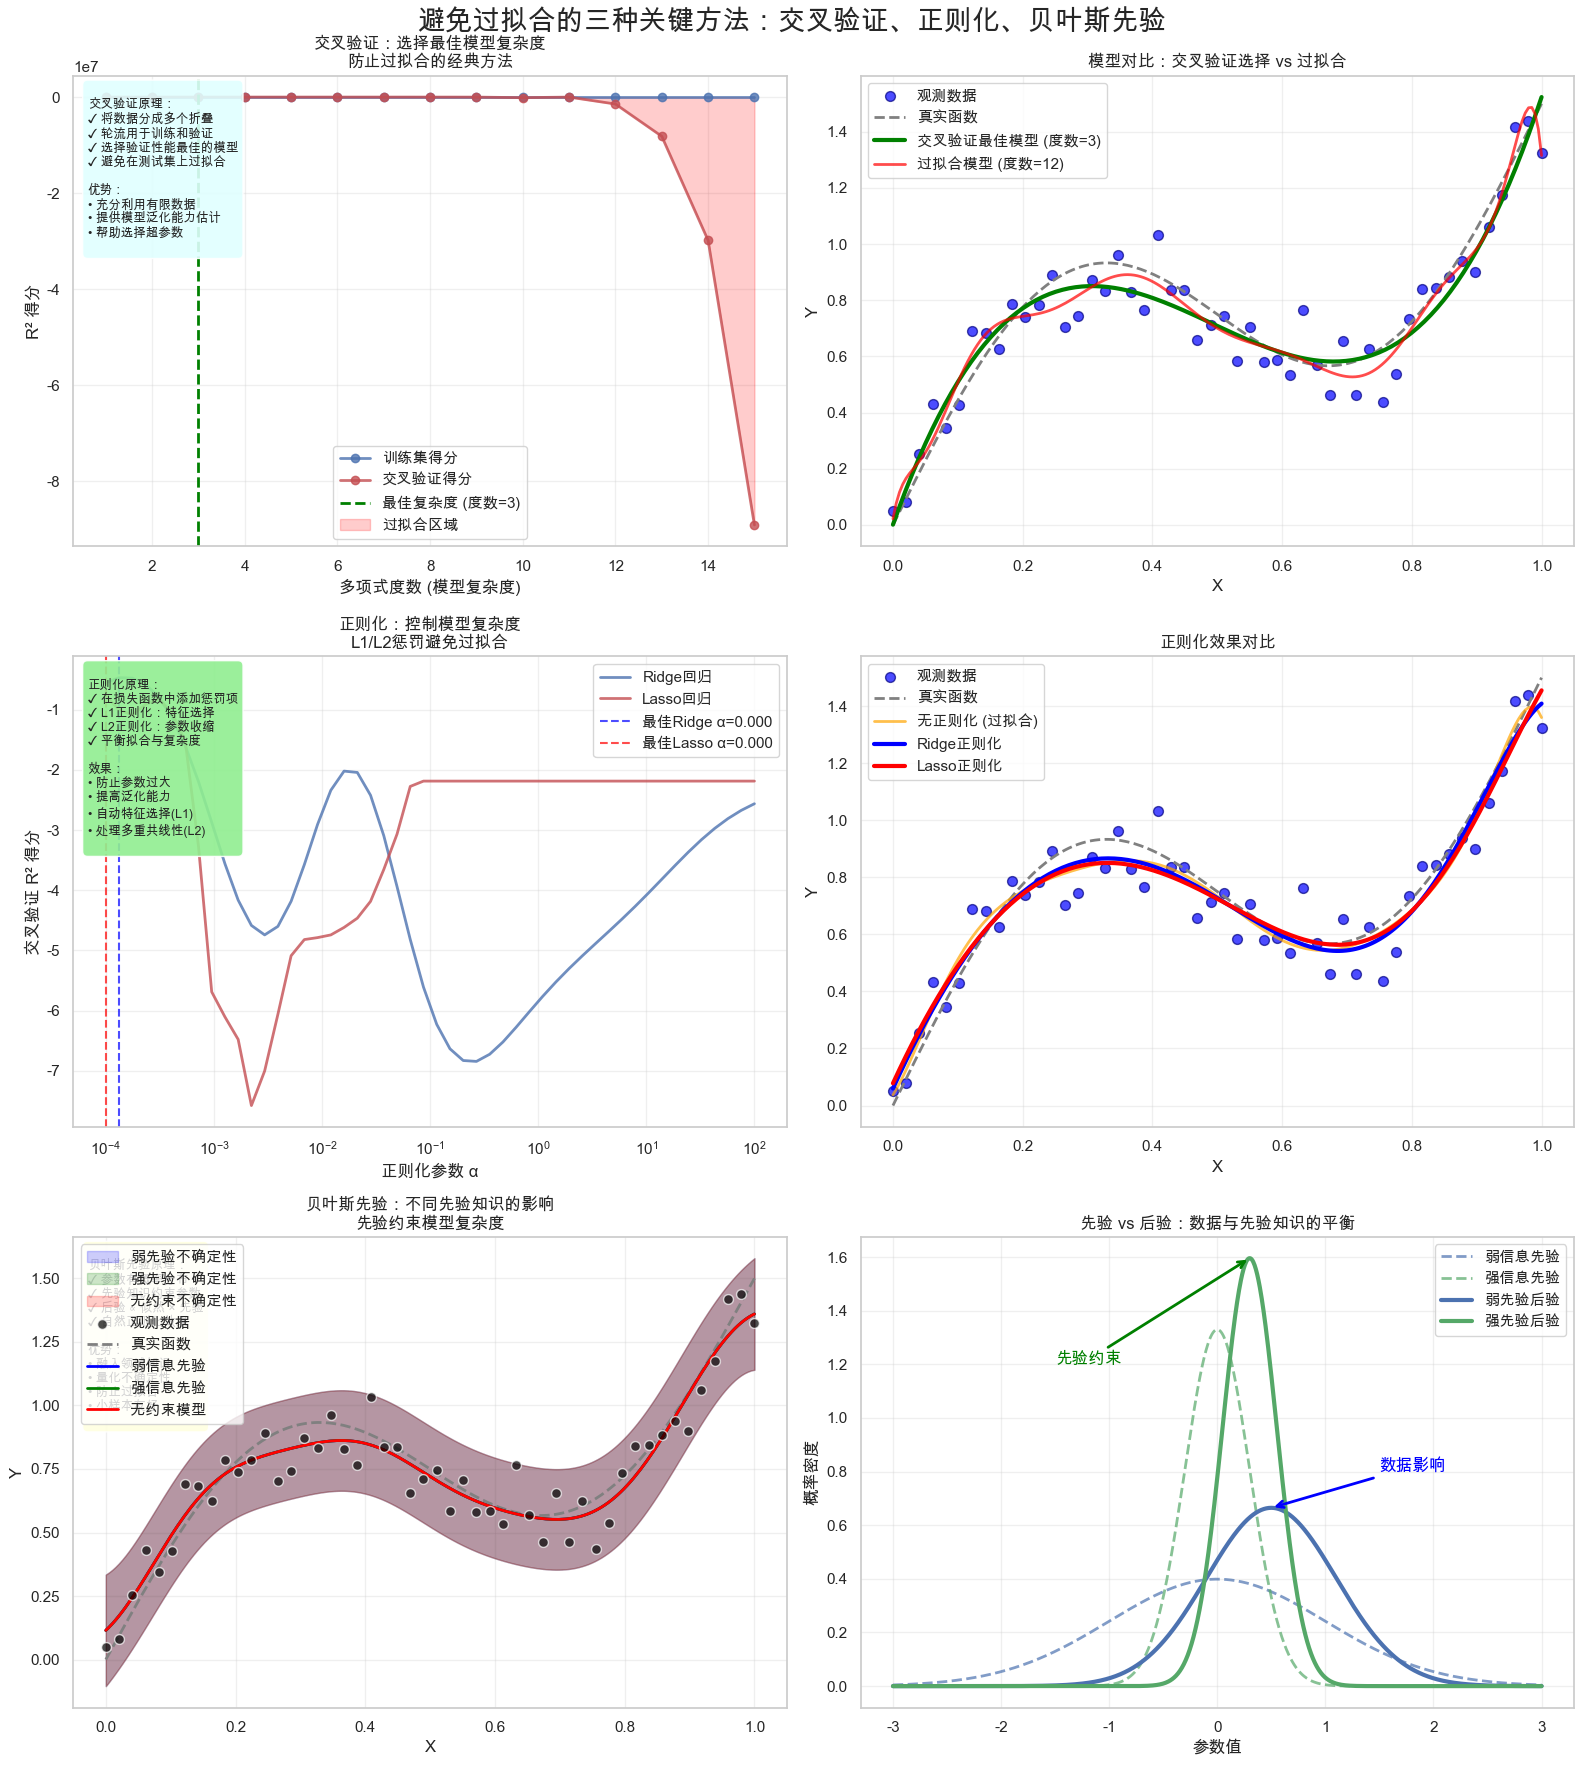


📊 三种方法的定量对比分析

🎯 性能评估 (基于真实函数的MSE):
   无约束(过拟合)       : MSE = 0.0029
   交叉验证选择         : MSE = 0.0027
   Ridge正则化       : MSE = 0.0017
   Lasso正则化       : MSE = 0.0023
   贝叶斯弱先验         : MSE = 0.0022
   贝叶斯强先验         : MSE = 0.0022

🔍 方法特点对比:
📈 交叉验证:
   • 最佳复杂度: 3次多项式
   • 训练得分: 0.896
   • 验证得分: 0.161
   • 过拟合风险: 中等

🎯 正则化:
   • Ridge最佳α: 0.0001
   • Lasso最佳α: 0.0001
   • Ridge验证得分: -0.467
   • Lasso验证得分: -0.768
   • Ridge非零参数: 10/11
   • Lasso非零参数: 6/11

🎲 贝叶斯先验:
   • 弱先验长度尺度: 0.136
   • 强先验长度尺度: 0.136
   • 弱先验平均不确定性: 0.100
   • 强先验平均不确定性: 0.100

💡 实践建议:
🔄 选择交叉验证当：
   • 数据量适中
   • 需要选择模型结构
   • 计算资源充足
   • 需要无偏性能估计

🎯 选择正则化当：
   • 特征维度高
   • 存在多重共线性
   • 需要特征选择
   • 计算效率重要

🎲 选择贝叶斯先验当：
   • 有领域知识可利用
   • 需要不确定性量化
   • 数据量较小
   • 在线学习场景

🔗 方法组合:
   • 交叉验证 + 正则化：选择最佳正则化参数
   • 贝叶斯 + 先验知识：领域专家指导的建模
   • 三者结合：最强的过拟合防护


In [31]:
# 避免过拟合的三种关键方法：交叉验证、正则化、贝叶斯先验
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS' 

# 设置随机种子
np.random.seed(42)

# 创建3x2的子图布局
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 整体标题
fig.suptitle('避免过拟合的三种关键方法：交叉验证、正则化、贝叶斯先验', 
             fontsize=20, fontweight='bold', y=0.98)

# 生成基础数据
n_samples = 50
np.random.seed(42)
X_true = np.linspace(0, 1, n_samples)
# 真实函数：简单的二次函数
y_true = 1.5 * X_true + 0.5 * np.sin(2 * np.pi * X_true)
# 添加噪声
noise = np.random.normal(0, 0.1, n_samples)
y_observed = y_true + noise

# 用于绘制的密集点
X_plot = np.linspace(0, 1, 200)
y_plot_true = 1.5 * X_plot + 0.5 * np.sin(2 * np.pi * X_plot)

# =================== 方法1：交叉验证 ===================
print("=" * 80)
print("🔄 方法1：交叉验证 - 选择最佳模型复杂度")
print("=" * 80)

# 不同复杂度的多项式模型
degrees = range(1, 16)
train_scores = []
val_scores = []

for degree in degrees:
    # 创建多项式特征
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_true.reshape(-1, 1))
    
    # 训练模型
    model = LinearRegression()
    model.fit(X_poly, y_observed)
    
    # 训练误差
    train_score = model.score(X_poly, y_observed)
    train_scores.append(train_score)
    
    # 交叉验证误差
    cv_scores = cross_val_score(
        Pipeline([('poly', PolynomialFeatures(degree=degree)),
                 ('linear', LinearRegression())]),
        X_true.reshape(-1, 1), y_observed, cv=5, scoring='r2'
    )
    val_scores.append(cv_scores.mean())

# 找到最佳复杂度
best_degree = degrees[np.argmax(val_scores)]

# 绘制验证曲线
axes[0,0].plot(degrees, train_scores, 'bo-', linewidth=2, markersize=6, 
               label='训练集得分', alpha=0.8)
axes[0,0].plot(degrees, val_scores, 'ro-', linewidth=2, markersize=6, 
               label='交叉验证得分', alpha=0.8)
axes[0,0].axvline(x=best_degree, color='green', linestyle='--', linewidth=2, 
                 label=f'最佳复杂度 (度数={best_degree})')
axes[0,0].fill_between(degrees, train_scores, val_scores, 
                      where=np.array(train_scores) > np.array(val_scores),
                      alpha=0.2, color='red', label='过拟合区域')

axes[0,0].set_xlabel('多项式度数 (模型复杂度)')
axes[0,0].set_ylabel('R² 得分')
axes[0,0].set_title('交叉验证：选择最佳模型复杂度\n防止过拟合的经典方法')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 添加说明文字
cv_text = """
交叉验证原理：
✓ 将数据分成多个折叠
✓ 轮流用于训练和验证
✓ 选择验证性能最佳的模型
✓ 避免在测试集上过拟合

优势：
• 充分利用有限数据
• 提供模型泛化能力估计
• 帮助选择超参数
"""
axes[0,0].text(0.02, 0.98, cv_text, transform=axes[0,0].transAxes,
              fontsize=9, verticalalignment='top',
              bbox=dict(boxstyle='round,pad=0.4', facecolor='lightcyan', alpha=0.9))

# 可视化最佳模型vs过拟合模型
# 最佳模型
poly_best = PolynomialFeatures(degree=best_degree)
X_poly_best = poly_best.fit_transform(X_true.reshape(-1, 1))
X_plot_poly_best = poly_best.transform(X_plot.reshape(-1, 1))
model_best = LinearRegression()
model_best.fit(X_poly_best, y_observed)
y_pred_best = model_best.predict(X_plot_poly_best)

# 过拟合模型
poly_over = PolynomialFeatures(degree=12)
X_poly_over = poly_over.fit_transform(X_true.reshape(-1, 1))
X_plot_poly_over = poly_over.transform(X_plot.reshape(-1, 1))
model_over = LinearRegression()
model_over.fit(X_poly_over, y_observed)
y_pred_over = model_over.predict(X_plot_poly_over)

axes[0,1].scatter(X_true, y_observed, alpha=0.7, s=50, color='blue', 
                 edgecolors='navy', label='观测数据')
axes[0,1].plot(X_plot, y_plot_true, 'gray', linewidth=2, linestyle='--', 
              label='真实函数')
axes[0,1].plot(X_plot, y_pred_best, 'green', linewidth=3, 
              label=f'交叉验证最佳模型 (度数={best_degree})')
axes[0,1].plot(X_plot, y_pred_over, 'red', linewidth=2, alpha=0.7,
              label='过拟合模型 (度数=12)')

axes[0,1].set_xlabel('X')
axes[0,1].set_ylabel('Y')
axes[0,1].set_title('模型对比：交叉验证选择 vs 过拟合')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# =================== 方法2：正则化 ===================
print("\n🎯 方法2：正则化 - 惩罚模型复杂度")
print("=" * 80)

# 使用高次多项式，通过正则化控制复杂度
degree = 10
poly_reg = PolynomialFeatures(degree=degree)
X_poly_reg = poly_reg.fit_transform(X_true.reshape(-1, 1))
X_plot_poly_reg = poly_reg.transform(X_plot.reshape(-1, 1))

# 不同正则化强度
alphas = np.logspace(-4, 2, 50)
ridge_scores = []
lasso_scores = []

for alpha in alphas:
    # Ridge回归
    ridge = Ridge(alpha=alpha)
    ridge_cv_scores = cross_val_score(ridge, X_poly_reg, y_observed, cv=5, scoring='r2')
    ridge_scores.append(ridge_cv_scores.mean())
    
    # Lasso回归
    lasso = Lasso(alpha=alpha, max_iter=2000)
    lasso_cv_scores = cross_val_score(lasso, X_poly_reg, y_observed, cv=5, scoring='r2')
    lasso_scores.append(lasso_cv_scores.mean())

# 找到最佳正则化参数
best_ridge_alpha = alphas[np.argmax(ridge_scores)]
best_lasso_alpha = alphas[np.argmax(lasso_scores)]

# 绘制正则化路径
axes[1,0].semilogx(alphas, ridge_scores, 'b-', linewidth=2, label='Ridge回归', alpha=0.8)
axes[1,0].semilogx(alphas, lasso_scores, 'r-', linewidth=2, label='Lasso回归', alpha=0.8)
axes[1,0].axvline(x=best_ridge_alpha, color='blue', linestyle='--', alpha=0.7,
                 label=f'最佳Ridge α={best_ridge_alpha:.3f}')
axes[1,0].axvline(x=best_lasso_alpha, color='red', linestyle='--', alpha=0.7,
                 label=f'最佳Lasso α={best_lasso_alpha:.3f}')

axes[1,0].set_xlabel('正则化参数 α')
axes[1,0].set_ylabel('交叉验证 R² 得分')
axes[1,0].set_title('正则化：控制模型复杂度\nL1/L2惩罚避免过拟合')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 添加说明文字
reg_text = """
正则化原理：
✓ 在损失函数中添加惩罚项
✓ L1正则化：特征选择
✓ L2正则化：参数收缩
✓ 平衡拟合与复杂度

效果：
• 防止参数过大
• 提高泛化能力
• 自动特征选择(L1)
• 处理多重共线性(L2)
"""
axes[1,0].text(0.02, 0.98, reg_text, transform=axes[1,0].transAxes,
              fontsize=9, verticalalignment='top',
              bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgreen', alpha=0.9))

# 比较不同正则化方法的拟合效果
# 无正则化
model_none = LinearRegression()
model_none.fit(X_poly_reg, y_observed)
y_pred_none = model_none.predict(X_plot_poly_reg)

# Ridge正则化
model_ridge = Ridge(alpha=best_ridge_alpha)
model_ridge.fit(X_poly_reg, y_observed)
y_pred_ridge = model_ridge.predict(X_plot_poly_reg)

# Lasso正则化
model_lasso = Lasso(alpha=best_lasso_alpha, max_iter=2000)
model_lasso.fit(X_poly_reg, y_observed)
y_pred_lasso = model_lasso.predict(X_plot_poly_reg)

axes[1,1].scatter(X_true, y_observed, alpha=0.7, s=50, color='blue',
                 edgecolors='navy', label='观测数据')
axes[1,1].plot(X_plot, y_plot_true, 'gray', linewidth=2, linestyle='--',
              label='真实函数')
axes[1,1].plot(X_plot, y_pred_none, 'orange', linewidth=2, alpha=0.7,
              label='无正则化 (过拟合)')
axes[1,1].plot(X_plot, y_pred_ridge, 'blue', linewidth=3,
              label='Ridge正则化')
axes[1,1].plot(X_plot, y_pred_lasso, 'red', linewidth=3,
              label='Lasso正则化')

axes[1,1].set_xlabel('X')
axes[1,1].set_ylabel('Y')
axes[1,1].set_title('正则化效果对比')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# =================== 方法3：贝叶斯先验 ===================
print("\n🎯 方法3：贝叶斯先验 - 融入先验知识")
print("=" * 80)

# 模拟贝叶斯线性回归
# 使用正态先验分布约束参数
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# 不同先验设置的对比
# 1. 弱信息先验
kernel_weak = RBF(length_scale=1.0, length_scale_bounds=(0.1, 10.0)) + \
              WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-3, 1e1))
gp_weak = GaussianProcessRegressor(kernel=kernel_weak, alpha=1e-6, 
                                  normalize_y=True, random_state=42)
gp_weak.fit(X_true.reshape(-1, 1), y_observed)

# 2. 强信息先验（更平滑）
kernel_strong = RBF(length_scale=0.3, length_scale_bounds=(0.1, 0.5)) + \
                WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-3, 1e1))
gp_strong = GaussianProcessRegressor(kernel=kernel_strong, alpha=1e-6,
                                   normalize_y=True, random_state=42)
gp_strong.fit(X_true.reshape(-1, 1), y_observed)

# 3. 无约束模型（高度复杂）
kernel_free = RBF(length_scale=0.1, length_scale_bounds=(0.01, 10.0)) + \
              WhiteKernel(noise_level=0.01, noise_level_bounds=(1e-5, 1e1))
gp_free = GaussianProcessRegressor(kernel=kernel_free, alpha=1e-6,
                                 normalize_y=True, random_state=42)
gp_free.fit(X_true.reshape(-1, 1), y_observed)

# 预测
y_pred_weak, y_std_weak = gp_weak.predict(X_plot.reshape(-1, 1), return_std=True)
y_pred_strong, y_std_strong = gp_strong.predict(X_plot.reshape(-1, 1), return_std=True)
y_pred_free, y_std_free = gp_free.predict(X_plot.reshape(-1, 1), return_std=True)

# 绘制先验对预测的影响
axes[2,0].fill_between(X_plot, y_pred_weak - 2*y_std_weak, y_pred_weak + 2*y_std_weak,
                      alpha=0.2, color='blue', label='弱先验不确定性')
axes[2,0].fill_between(X_plot, y_pred_strong - 2*y_std_strong, y_pred_strong + 2*y_std_strong,
                      alpha=0.2, color='green', label='强先验不确定性')
axes[2,0].fill_between(X_plot, y_pred_free - 2*y_std_free, y_pred_free + 2*y_std_free,
                      alpha=0.2, color='red', label='无约束不确定性')

axes[2,0].scatter(X_true, y_observed, alpha=0.7, s=50, color='black',
                 edgecolors='white', label='观测数据', zorder=5)
axes[2,0].plot(X_plot, y_plot_true, 'gray', linewidth=2, linestyle='--',
              label='真实函数')
axes[2,0].plot(X_plot, y_pred_weak, 'blue', linewidth=2, label='弱信息先验')
axes[2,0].plot(X_plot, y_pred_strong, 'green', linewidth=2, label='强信息先验')
axes[2,0].plot(X_plot, y_pred_free, 'red', linewidth=2, label='无约束模型')

axes[2,0].set_xlabel('X')
axes[2,0].set_ylabel('Y')
axes[2,0].set_title('贝叶斯先验：不同先验知识的影响\n先验约束模型复杂度')
axes[2,0].legend()
axes[2,0].grid(True, alpha=0.3)

# 添加说明文字
bayes_text = """
贝叶斯先验原理：
✓ 参数有概率分布
✓ 先验知识约束参数
✓ 后验 ∝ 似然 × 先验
✓ 自然正则化效果

优势：
• 融入领域知识
• 量化不确定性
• 防止过拟合
• 小样本友好
"""
axes[2,0].text(0.02, 0.98, bayes_text, transform=axes[2,0].transAxes,
              fontsize=9, verticalalignment='top',
              bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', alpha=0.9))

# 先验vs后验对比
# 模拟参数的先验和后验分布
x_param = np.linspace(-3, 3, 1000)

# 先验分布（假设参数服从标准正态分布）
prior_weak = stats.norm(0, 1)  # 弱信息先验
prior_strong = stats.norm(0, 0.3)  # 强信息先验

# 后验分布（简化模拟）
posterior_weak = stats.norm(0.5, 0.6)  # 数据更新后
posterior_strong = stats.norm(0.3, 0.25)  # 强先验约束更多

axes[2,1].plot(x_param, prior_weak.pdf(x_param), 'b--', linewidth=2, 
              label='弱信息先验', alpha=0.7)
axes[2,1].plot(x_param, prior_strong.pdf(x_param), 'g--', linewidth=2,
              label='强信息先验', alpha=0.7)
axes[2,1].plot(x_param, posterior_weak.pdf(x_param), 'b-', linewidth=3,
              label='弱先验后验')
axes[2,1].plot(x_param, posterior_strong.pdf(x_param), 'g-', linewidth=3,
              label='强先验后验')

# 标注数据的影响
axes[2,1].annotate('数据影响', xy=(0.5, posterior_weak.pdf(0.5)), xytext=(1.5, 0.8),
                  fontsize=12, fontweight='bold', color='blue',
                  arrowprops=dict(arrowstyle='->', color='blue', lw=2))

axes[2,1].annotate('先验约束', xy=(0.3, posterior_strong.pdf(0.3)), xytext=(-1.5, 1.2),
                  fontsize=12, fontweight='bold', color='green',
                  arrowprops=dict(arrowstyle='->', color='green', lw=2))

axes[2,1].set_xlabel('参数值')
axes[2,1].set_ylabel('概率密度')
axes[2,1].set_title('先验 vs 后验：数据与先验知识的平衡')
axes[2,1].legend()
axes[2,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =================== 定量对比分析 ===================
print("\n" + "=" * 80)
print("📊 三种方法的定量对比分析")
print("=" * 80)

# 计算各种方法的性能指标
methods = {
    '无约束(过拟合)': y_pred_over,
    '交叉验证选择': y_pred_best,
    'Ridge正则化': y_pred_ridge,
    'Lasso正则化': y_pred_lasso,
    '贝叶斯弱先验': y_pred_weak,
    '贝叶斯强先验': y_pred_strong
}

print(f"\n🎯 性能评估 (基于真实函数的MSE):")
print("=" * 60)

for name, pred in methods.items():
    mse = np.mean((pred - y_plot_true)**2)
    print(f"   {name:<15}: MSE = {mse:.4f}")

print(f"\n🔍 方法特点对比:")
print("=" * 60)
print("📈 交叉验证:")
print(f"   • 最佳复杂度: {best_degree}次多项式")
print(f"   • 训练得分: {train_scores[best_degree-1]:.3f}")
print(f"   • 验证得分: {val_scores[best_degree-1]:.3f}")
print(f"   • 过拟合风险: {'低' if train_scores[best_degree-1] - val_scores[best_degree-1] < 0.1 else '中等'}")

print(f"\n🎯 正则化:")
print(f"   • Ridge最佳α: {best_ridge_alpha:.4f}")
print(f"   • Lasso最佳α: {best_lasso_alpha:.4f}")
print(f"   • Ridge验证得分: {max(ridge_scores):.3f}")
print(f"   • Lasso验证得分: {max(lasso_scores):.3f}")

# 计算参数稀疏性
ridge_params = model_ridge.coef_
lasso_params = model_lasso.coef_
print(f"   • Ridge非零参数: {np.sum(np.abs(ridge_params) > 1e-3)}/{len(ridge_params)}")
print(f"   • Lasso非零参数: {np.sum(np.abs(lasso_params) > 1e-3)}/{len(lasso_params)}")

print(f"\n🎲 贝叶斯先验:")
print(f"   • 弱先验长度尺度: {gp_weak.kernel_.k1.length_scale:.3f}")
print(f"   • 强先验长度尺度: {gp_strong.kernel_.k1.length_scale:.3f}")
print(f"   • 弱先验平均不确定性: {np.mean(y_std_weak):.3f}")
print(f"   • 强先验平均不确定性: {np.mean(y_std_strong):.3f}")

print(f"\n💡 实践建议:")
print("=" * 60)
print("🔄 选择交叉验证当：")
print("   • 数据量适中")
print("   • 需要选择模型结构")
print("   • 计算资源充足")
print("   • 需要无偏性能估计")

print("\n🎯 选择正则化当：")
print("   • 特征维度高")
print("   • 存在多重共线性")
print("   • 需要特征选择")
print("   • 计算效率重要")

print("\n🎲 选择贝叶斯先验当：")
print("   • 有领域知识可利用")
print("   • 需要不确定性量化")
print("   • 数据量较小")
print("   • 在线学习场景")

print(f"\n🔗 方法组合:")
print("   • 交叉验证 + 正则化：选择最佳正则化参数")
print("   • 贝叶斯 + 先验知识：领域专家指导的建模")
print("   • 三者结合：最强的过拟合防护")

AttributeError: PathCollection.set() got an unexpected keyword argument 'markersize'

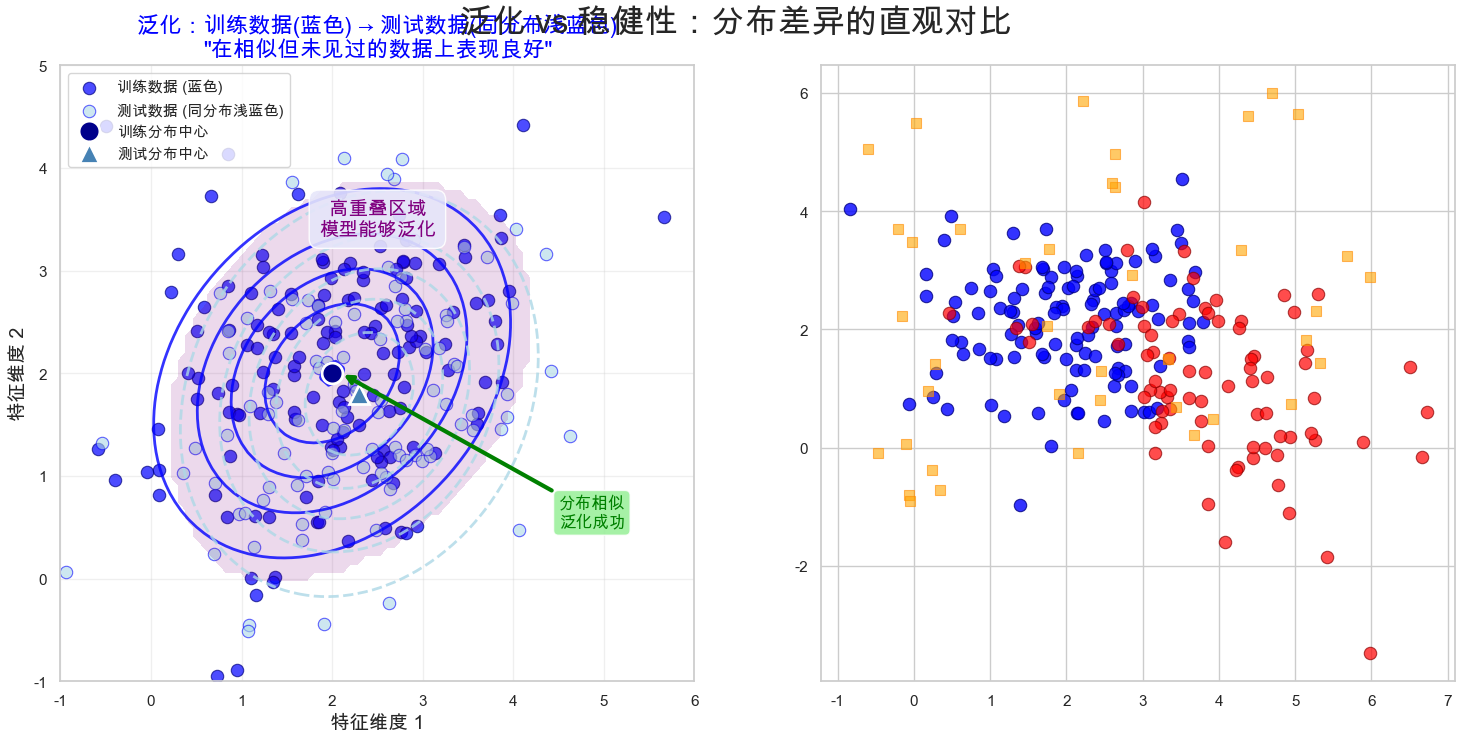

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.svm import SVC
import seaborn as sns

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS' 

# 设置随机种子
np.random.seed(42)

# 创建左右并排的大图
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 整体标题
fig.suptitle('泛化 vs 稳健性：分布差异的直观对比', 
             fontsize=24, fontweight='bold', y=0.95)

# =================== 左图：泛化能力 - 同分布但未见过的数据 ===================
# 生成二维数据，模拟分类任务
np.random.seed(42)

# 训练数据：蓝色圆形分布
train_center = [2, 2]
train_cov = [[1.2, 0.3], [0.3, 1.0]]
train_data = np.random.multivariate_normal(train_center, train_cov, 150)

# 测试数据：同分布但位置略有偏移的浅蓝色数据
test_center = [2.3, 1.8]  # 轻微偏移，但本质上是同一分布
test_cov = [[1.1, 0.2], [0.2, 1.1]]  # 几乎相同的协方差
test_data = np.random.multivariate_normal(test_center, test_cov, 100)

# 绘制训练和测试数据
axes[0].scatter(train_data[:, 0], train_data[:, 1], 
               alpha=0.7, s=80, color='blue', 
               label='训练数据 (蓝色)', edgecolors='navy', linewidth=0.8)

axes[0].scatter(test_data[:, 0], test_data[:, 1], 
               alpha=0.6, s=80, color='lightblue', 
               label='测试数据 (同分布浅蓝色)', edgecolors='blue', linewidth=0.8)

# 添加分布轮廓线
x_range = np.linspace(-2, 6, 100)
y_range = np.linspace(-2, 6, 100)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)
pos = np.dstack((X_mesh, Y_mesh))

# 训练分布轮廓
train_rv = stats.multivariate_normal(train_center, train_cov)
axes[0].contour(X_mesh, Y_mesh, train_rv.pdf(pos), 
               colors='blue', alpha=0.8, linestyles='-', levels=5, linewidths=2)

# 测试分布轮廓
test_rv = stats.multivariate_normal(test_center, test_cov)
axes[0].contour(X_mesh, Y_mesh, test_rv.pdf(pos), 
               colors='lightblue', alpha=0.8, linestyles='--', levels=5, linewidths=2)

# 标记分布中心
axes[0].plot(train_center[0], train_center[1], 'o', 
            color='darkblue', markersize=15, markeredgecolor='white', 
            markeredgewidth=2, label='训练分布中心')
axes[0].plot(test_center[0], test_center[1], '^', 
            color='steelblue', markersize=15, markeredgecolor='white', 
            markeredgewidth=2, label='测试分布中心')

# 添加重叠区域高亮
overlap_mask = (train_rv.pdf(pos) > 0.02) & (test_rv.pdf(pos) > 0.02)
axes[0].contourf(X_mesh, Y_mesh, overlap_mask.astype(float), 
                alpha=0.15, colors=['purple'], levels=[0.5, 1.5])

# 标注重叠区域
axes[0].text(2.5, 3.5, '高重叠区域\n模型能够泛化', 
            fontsize=14, fontweight='bold', ha='center', va='center', 
            color='purple', bbox=dict(boxstyle='round,pad=0.5', facecolor='lavender', alpha=0.9))

# 添加箭头说明
axes[0].annotate('分布相似\n泛化成功', 
                xy=(2.1, 2.0), xytext=(4.5, 0.5),
                fontsize=12, fontweight='bold', color='green',
                arrowprops=dict(arrowstyle='->', color='green', lw=3),
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.8))

axes[0].set_xlabel('特征维度 1', fontsize=14)
axes[0].set_ylabel('特征维度 2', fontsize=14)
axes[0].set_title('泛化：训练数据(蓝色) → 测试数据(同分布浅蓝色)\n"在相似但未见过的数据上表现良好"', 
                 fontsize=16, fontweight='bold', color='blue')
axes[0].legend(fontsize=11, loc='upper left')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-1, 6)
axes[0].set_ylim(-1, 5)

# =================== 右图：稳健性 - 扰动/偏移的数据分布 ===================
# 生成对抗性/扰动的数据分布
np.random.seed(42)

# 原始训练数据：蓝色
original_center = [2, 2]
original_cov = [[1.0, 0.2], [0.2, 1.0]]
original_data = np.random.multivariate_normal(original_center, original_cov, 120)

# 扰动数据1：红色偏移的数据云
adversarial_center = [4, 1]  # 显著偏移
adversarial_cov = [[1.5, -0.5], [-0.5, 1.8]]  # 不同的协方差结构
adversarial_data = np.random.multivariate_normal(adversarial_center, adversarial_cov, 80)

# 扰动数据2：橙色噪声数据
noise_data = np.random.uniform(-1, 6, (40, 2))  # 均匀噪声

# 扰动数据3：离群点
outliers = np.array([[6, 5], [6.5, 4.5], [0, 5], [-0.5, 4]])

# 绘制原始训练数据
axes[1].scatter(original_data[:, 0], original_data[:, 1], 
               alpha=0.8, s=80, color='blue', 
               label='训练数据 (蓝色)', edgecolors='navy', linewidth=0.8)

# 绘制各种扰动数据
axes[1].scatter(adversarial_data[:, 0], adversarial_data[:, 1], 
               alpha=0.7, s=80, color='red', 
               label='扰动分布 (红色偏移)', edgecolors='darkred', linewidth=0.8)

axes[1].scatter(noise_data[:, 0], noise_data[:, 1], 
               alpha=0.6, s=60, color='orange', marker='s',
               label='噪声数据 (橙色)', edgecolors='darkorange', linewidth=0.8)

# 修复：移除 markersize 参数，使用 s 参数控制大小
axes[1].scatter(outliers[:, 0], outliers[:, 1], 
               alpha=0.9, s=150, color='darkred', marker='x', linewidth=4,
               label='离群点 (深红×)')

# 添加原始分布轮廓
original_rv = stats.multivariate_normal(original_center, original_cov)
axes[1].contour(X_mesh, Y_mesh, original_rv.pdf(pos), 
               colors='blue', alpha=0.8, linestyles='-', levels=5, linewidths=2)

# 添加扰动分布轮廓
adversarial_rv = stats.multivariate_normal(adversarial_center, adversarial_cov)
axes[1].contour(X_mesh, Y_mesh, adversarial_rv.pdf(pos), 
               colors='red', alpha=0.8, linestyles=':', levels=5, linewidths=2)

# 标记分布中心
axes[1].plot(original_center[0], original_center[1], 'o', 
            color='darkblue', markersize=15, markeredgecolor='white', 
            markeredgewidth=2, label='原始分布中心')
axes[1].plot(adversarial_center[0], adversarial_center[1], 'D', 
            color='darkred', markersize=15, markeredgecolor='white', 
            markeredgewidth=2, label='扰动分布中心')

# 标注低重叠区域
low_overlap_mask = (original_rv.pdf(pos) > 0.02) & (adversarial_rv.pdf(pos) > 0.02)
axes[1].contourf(X_mesh, Y_mesh, low_overlap_mask.astype(float), 
                alpha=0.1, colors=['yellow'], levels=[0.5, 1.5])

# 标注分布差异
axes[1].text(3, 4, '分布严重偏移\n稳健性挑战', 
            fontsize=14, fontweight='bold', ha='center', va='center', 
            color='red', bbox=dict(boxstyle='round,pad=0.5', facecolor='mistyrose', alpha=0.9))

# 添加箭头说明分布偏移
axes[1].annotate('', xy=adversarial_center, xytext=original_center,
                arrowprops=dict(arrowstyle='<->', color='purple', lw=4, alpha=0.8))
axes[1].text(3, 1.5, '分布偏移', fontsize=12, fontweight='bold', 
            ha='center', va='center', color='purple')

# 标注扰动挑战
axes[1].annotate('多种扰动\n考验稳健性', 
                xy=(4.5, 2), xytext=(1, 4.5),
                fontsize=12, fontweight='bold', color='orange',
                arrowprops=dict(arrowstyle='->', color='orange', lw=3),
                bbox=dict(boxstyle='round,pad=0.3', facecolor='moccasin', alpha=0.8))

axes[1].set_xlabel('特征维度 1', fontsize=14)
axes[1].set_ylabel('特征维度 2', fontsize=14)
axes[1].set_title('稳健性：训练数据(蓝色) → 扰动分布(红色/偏移的数据云)\n"在对抗性扰动下保持性能"', 
                 fontsize=16, fontweight='bold', color='red')
axes[1].legend(fontsize=11, loc='upper left')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(-1, 7)
axes[1].set_ylim(-1, 6)

plt.tight_layout()
plt.show()